# Convert .Rmd to .ipynb


In [5]:
# install.packages("devtools")
# remove.packages("rlang")
# install.packages("rlang")
# devtools::install_github("mkearney/rmd2jupyter")
# install.packages("rmd2jupyter")
# library("rmd2jupyter")

In [6]:
# rmd to ipynb
# rmd2jupyter("Preprocessing Data for Meta-Analyses.Rmd")

In [7]:
# install.packages("rmarkdown")

# Preprocess data of raw covidence Export



In [8]:
raw.df <- read.csv("final_data_export.csv")


## Install and load Dplyr


In [9]:
# install.packages("dplyr")
library("dplyr")
install.packages("sjmisc")
library("sjmisc")
# for data manipulation with dplyr see: https://www.youtube.com/watch?v=Gvhkp-Yw65U
# for splitting 2 values in 1 cell see: https://www.youtube.com/watch?v=DiY8EqZDwoI at 3:17 (e.g. if 2 scales for 1 outcome)
# for joining 2 data frames see:        https://www.youtube.com/watch?v=DiY8EqZDwoI at 11:57


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘datawizard’, ‘insight’, ‘sjlabelled’




In [10]:
my.raw.df <- raw.df %>%
  filter(Reviewer.Name == "Robin Jacob", Study.design == "Passive RCT")

## Drop unimportant columns by name

### Remove column rages (first columns)

In [11]:
my.df <- my.raw.df %>%
  select(-Reviewer.Name:-Further.Information.inserted.in.Extraction.Form.)  # "-" indicates deleting these columns

### Remove single column names and repeating names with ascending numbers (table headlines)


In [12]:
cols.pop.char <- c()

for (time.point in 0:4){
  cols.pop.char <- append(cols.pop.char,
                          sprintf("Population.Characteristics..Time.Point.%d..",
                                  time.point
                                  )
                          )
}

cols.outc.t <- c()

for (outc in 1:7){
  for (t in 0:3){
    cols.outc.t <- append(cols.outc.t,
                          sprintf("Outcome.%d..Time.Point.%d..",
                                  outc, t
                                  )
                          )
  }
}

cols.quant.results <- c()

i <- 0
for (int.1 in 1:3){
  i <- i + 1
  if (i == 1){
    for (int.2 in 2:4){
      for (t in 1:3){
        cols.quant.results <- append(cols.quant.results,
                              sprintf("Results.for.Int%d.X.Int%d.of.Time.Point.%d.",
                                      int.1, int.2, t
                                      )
                              )
      }
    }
  } else if (i == 2){
    for (int.2 in 3:4){
      for (t in 1:3){
        cols.quant.results <- append(cols.quant.results,
                              sprintf("Results.for.Int%d.X.Int%d.of.Time.Point.%d.",
                                      int.1, int.2, t
                                      )
                              )
      }
    }
  } else if (i == 3){
    int.2 <- 4
    for (t in 1:3){
      cols.quant.results <- append(cols.quant.results,
                            sprintf("Results.for.Int%d.X.Int%d.of.Time.Point.%d.",
                                    int.1, int.2, t
                                    )
                            )
    }
  } else {
    print("i not = 1, 2, or 3")
  }
}

remove.cols <- c(cols.pop.char[],
                 "Dates.of.Measuring.Time.Points.",
                 "Between.Measuring.Time.Points..Duration.",
                 "Intervention.and.Comparisons.",
                 "Definition.of.Outcomes.",
                 "Measures.of.Outcomes.",
                 cols.outc.t[],
                 cols.quant.results[],
                 "Results.of.Key.Themes."
                 )

my.df <- my.df[, ! names(my.df) %in% remove.cols]

In [13]:
# set options to print entire df (extend max. rows end cols)
options(repr.matrix.max.rows=30, repr.matrix.max.cols=1100)

In [14]:
my.df

Covidence.. Study.ID                
1  4325        Ratanasiripong 2015     
2  4178        Sloan 2016              
3  3762        Nidich 2009             
4  3760        Barry 2019              
5  3759        Chen 2013               
6  3736        Warnecke 2011           
7  2925        Johnson-Waddell 2018    
8  2864        Plummer 2018            
9  2574        Janowiak 1994           
10 2416        Oman 2007               
11 2267        Weytens 2014            
12 2201        Bonamo 2015             
13 2075        Smith 2021              
14 1897        Wang 2021               
15 1889        Fish 2019               
16 1737        Siembor 2018            
17 1582        Lee 2018                
18 1574        Bultas 2021             
19 1469        Huberty 2019            
20 1416        Tanner 2009             
21 1329        deGrace 1976            
22 1322        Messer 2016             
23 1259        Vasiliauskas 2013       
24 1225        Nolan 2020              
25 1159        Dorais 2021             
26  361        Toole 2016              
27  122        Schulte-Frankenfeld 2021
   Title                                                                                                                                                                                            
1  Stress and Anxiety Management in Nursing Students: Biofeedback and Mindfulness Meditation                                                                                                        
2  Self-perceived stress of undergraduate students before and after participation in a breathing meditation intervention: A mixed methods study                                                     
3  A randomized controlled trial on effects of the Transcendental Meditation program on blood pressure, psychological distress, and coping in young adults                                          
4  A randomized controlled trial of the effects of mindfulness practice on doctoral candidate psychological status                                                                                  
5  A randomized controlled trial of the effects of brief mindfulness meditation on anxiety symptoms and systolic blood pressure in Chinese nursing students                                         
6  A randomised controlled trial of the effects of mindfulness practice on medical student stress levels                                                                                            
7  Mindfulness meditation's effect on college/university students' mindfulness and transformational leadership                                                                                      
8  Mindfulness in a Graduate Nursing Curriculum: A Randomized Controlled Study                                                                                                                      
9  Meditation and college students' self-actualization and rated stress                                                                                                                             
10 Learning from spiritual models and meditation: A randomized evaluation of a college course                                                                                                       
11 An integrative theory-driven positive emotion regulation intervention                                                                                                                            
12 The influence of a brief mindfulness exercise on encoding of novel words in female college students                                                                                              
13 Impact of App-Delivered Mindfulness Meditation on Functional Connectivity, Mental Health, and Sleep Disturbances Among Physician Assistant Students: Randomized, Wait-list Controlled Pilot Study
14 Gender differences in the benefits of meditation training on attentional blink                                            


## Create arrays and data frame lists from Covidence tables



### Set basic parameters


In [15]:
nm.placeholder <- -999  # placeholder for values marked as nm (not mentioned)

flag.x.s.r <- 2
  # x.s.r = exact value (0), mean s (1), or mean r (2)
  # flag.x.s.r = 2 --> include all
  # flag.x.s.r = 1 --> only include mean s and exact values
  # flag.x.s.r = 0 --> include only exact vaules

study.no <- length(my.df[,"Study.ID"])

### Functions

#### Checking for digits and characters

In [16]:
# function returning TRUE if string contains no characters but digits instead
no.char.but.digit.inside <- function(value){
  !(str_contains(value, letters, logic = "OR") |
  str_contains(value, LETTERS, logic = "OR")) &
  grepl("\\d", value)
}

# function returning TRUE if string contains characters
char.inside <- function(value){
  str_contains(value, letters, logic = "OR") |
  str_contains(value, LETTERS, logic = "OR")
}

In [17]:
char.inside("mindfulness meditation")

[1] TRUE


#### For mean values


In [18]:
# extracts mean r and mean s values as double
get.all.means <- function(value){
  if (grepl("mean r", value)){
    extracted.value <- as.double(sub(" mean r.*", "", value))
        # extracts anything before " mean r" as double                 
  } else if (grepl("mean s", value)){
    extracted.value <- as.double(sub(" mean s.*", "", value))
  } else if (grepl("mean", value)){
    extracted.value <- NA
    cat("value ", value, " not added because mean only")
    cat("\n")
  } else {
    extracted.value <- value
  }
  extracted.value
}

# extracts mean s only as double
get.mean.s.only <- function(value){
    if (grepl("mean s", value)){
    extracted.value <- as.double(sub(" mean s.*", "", value))
  } else if (grepl("mean r", value)){
    extracted.value <- NA
    cat("value ", value, " not added because mean r")
    cat("\n")
  } else if (grepl("mean", value)){
    extracted.value <- NA
    cat("value ", value, " not added because mean only")
    cat("\n")
  } else {
    extracted.value <- value
  }
  extracted.value
}


#### Convert value from nm, NA, digit, or char


In [19]:
 round(1.56565, digits = 3)

[1] 1.566

In [20]:
convert.value <- function(value, nm.placeholder, only.double = TRUE){
  na.value <- FALSE
  if (is.na(value)){
    na.value <- TRUE
  }
  if (na.value == TRUE){
    extracted.value <- NA
  } else {
    value <- as.character(value)

# special cases
    if (value == "nm"){
      extracted.value <- nm.placeholder
    } else if (value == ""){
      extracted.value <- NA
    } else if (value == "^"){
      extracted.value <- value
        # extracts value after "<" as double 
    } else if (grepl("<", value)){
      extracted.value <- as.double(sub(".*<", "", value))
        # extracts value after "<" as double 
    } else if (grepl(">", value)){
      extracted.value <- as.double(sub(".*>", "", value))

# no.char.but.digit
    } else if (no.char.but.digit.inside(value)){
      if (grepl(",", value)){
        cat("decimal separator replaced with point in ", value)
        extracted.value <- as.double(sub(",", ".", value))
          # sub(a, b, value) replaces a with b in value
      } else if (grepl("-", value)){
        # like "0 - 40"
        extracted.value <- value
      } else {
        extracted.value <- as.double(value) 
      }

# char
    } else if (char.inside(value)){
      if (flag.x.s.r == 2){
        extracted.value <- get.all.means(value)
      } else if (flag.x.s.r == 1){
        extracted.value <- get.mean.s.only(value)
      } else if ((flag.x.s.r == 0) & !(grepl("mean r", value) | grepl("mean s", value))){
        extracted.value <- NA
        if (grepl("mean", value)){
          cat("value not added because mean only: ", value)
          cat("\n")
        }
      } else {
        if (only.double == TRUE){
          extracted.value <- NA
          cat("unknown case with char inside: ", value)
          cat("\n")
        } else {
          extracted.value <- value
        }
      }
    } else {
      cat("unknown case: ", value)
      cat("\n")
    }
  }
  extracted.value
}

#### Check if multiple commas are present in string

In [21]:
multiple.commas.present <- function(input.string){
  multiple.commas.present <- FALSE
  comma.count <- 0

  iterable.string <- tryCatch(
    {
      strsplit(input.string, "")[[1]]
        # strsplit(input.string, "")[[1]] makes string iterable
        # "try" part
    },
    error=function(cond) {
      message(paste("Error of multiple.commas.present() for input:", input.string, "| Type:", class(input.string)))
      # message(cond)
      return("")
      # "except" part for errors
    },
    warning=function(cond) {
      message(paste("Warning of multiple.commas.present() for input:", input.string, "| Type:", class(input.string)))
      # message(cond)
      return("")
      # "except" part for warnings
    }
  )
    # see following link for exception handling: https://stackoverflow.com/questions/12193779/how-to-write-trycatch-in-r

  for (i in iterable.string){
    if (i == ","){
      comma.count <- comma.count + 1
    }
  }
  if (comma.count > 1){
    multiple.commas.present <- TRUE
  }
  multiple.commas.present
}


#### For arrays


In [22]:
clean.and.shape.data.to.array <- function(
  my.df, start, end, dims, dimname.list, nm.placeholder, flag.x.s.r, study.no
  ){
  my.array <- array(rep(NA),
                    dim = dims,
                    dimnames = dimname.list
                    )
  my.data <- my.df %>%
    select(start:end)
  
  if (length(dims) == 6){
    for (study in 1:study.no){
      my.data.col.no = 1
      for (dim.4.elmnt in 1:dims[4]){
        for (mtrx in 1:dims[3]){
          for (row in 1:dims[1]){
            for (col in 1:dims[2]){
              value <- my.data[study, my.data.col.no]
              my.data.col.no <- my.data.col.no + 1
              if (grepl(",", value)){
                if (!multiple.commas.present(value)){
                  value.before.comma <- sub(",.*", "", value)
                    # extracts anything before "," as double
                  my.array[row, col, mtrx, dim.4.elmnt, 1, study] <- convert.value(
                    value.before.comma, nm.placeholder
                    )
                  value.after.comma <- sub(".*,", "", value)
                    # extracts anything after "," as double
                  my.array[row, col, mtrx, dim.4.elmnt, 2, study] <- convert.value(
                    value.after.comma, nm.placeholder
                    )
                } else {
                    cat(value, "has multiple commas, find solution")
                  }
              } else {
                my.array[row, col, mtrx, dim.4.elmnt, 1, study] <- convert.value(
                  value, nm.placeholder
                  )
              }
            }
          }
        }
      }
    }
  } else if (length(dims) <= 4){
    for (study in 1:study.no){
      my.data.col.no = 1
      for (mtrx in 1:dims[3]){
        for (row in 1:dims[1]){
          for (col in 1:dims[2]){
            value <- my.data[study, my.data.col.no]
            my.data.col.no <- my.data.col.no + 1
            my.array[row, col, mtrx, study] <- convert.value(
              value, nm.placeholder
              )
          }
        }
      }
    }
  } else {
    print("unknwon dimesion")
  }
  my.array
}


#### For data frame lists


In [23]:
# create data frames out of 2D Tables (with rows and cols swapped)
clean.data.to.df.list.swap <- function(
  my.df, start, end, dims, list.names, dimname.list, check.multiple.commas = FALSE
  ){
  study.df <- data.frame(matrix(
    rep(NA),
    nrow = dims[1],
    ncol = dims[2]
  ))
  row.names(study.df) <- dimname.list[[1]]
  colnames(study.df) <- dimname.list[[2]]
  
  # create list of NA data frames of preferred shape
  study.df.list <- list()
  for (i in 1:length(list.names)){
    study.df.list <- append(study.df.list, list(study.df), 0)
  }
  names(study.df.list) <- list.names
  
  my.data <- my.df %>%
    select(start:end)
  
  # vector of my.data.col.no to swapped rows and cols of Covidence output
  my.data.col.no.swapped <- c()
  i <- 0
  j <- 1
  for (k in 1:dims[1]){
    i <- 0
    for (l in 1:dims[2]){
      my.data.col.no.swapped <- append(my.data.col.no.swapped, i * dims[1] + j)
      i <- i + 1
    }
    j <- j + 1 
  }
  # dims[1] = rows new, cols old
  # dims[2] = cols new, rows old
  
  # e.g., filling pattern for old 4 x 7 and new 7 x 4 data frame 
  ## 1, dims[1]+1, 2*dims[1]+1, 3*dims[1]+1, 4*dims[1]+1, 5*dims[1]+1, 6*dims[1]+1,
  ## 2, dims[1]+2, 2*dims[1]+2, 3*dims[1]+2, 4*dims[1]+2, 5*dims[1]+2, 6*dims[1]+2,
  ## x, x, x, x, x, x, x,
  ## x, x, x, x, x, x, x
  
  for (study in 1:study.no){
    m <- 1
    for (row in 1:dims[1]){
      for (col in 1:dims[2]){
        value <- my.data[study, my.data.col.no.swapped[m]]
        m <- m + 1

        if (check.multiple.commas & is.character(value)){
          if (multiple.commas.present(value)){
            cat("multiple commas in value, find solution:\n", value, "\n")
          }
        }
        
        study.df.list[[study]][row, col] <- convert.value(
          value, nm.placeholder, only.double = FALSE
          )
      }
    }
  }
  study.df.list
}


In [24]:
# create data frames out of 2D Tables
clean.data.to.df.list <- function(
  my.df, start, end, dims, list.names, dimname.list, check.multiple.commas = FALSE
  ){
  study.df <- data.frame(matrix(
    rep(NA),
    nrow = dims[1],
    ncol = dims[2]
  ))
  row.names(study.df) <- dimname.list[[1]]
  colnames(study.df) <- dimname.list[[2]]
  
  # create list of NA data frames of preferred shape
  study.df.list <- list()
  for (i in 1:length(list.names)){
    study.df.list <- append(study.df.list, list(study.df), 0)
  }
  names(study.df.list) <- list.names
  
  my.data <- my.df %>%
    select(start:end)
  
  for (study in 1:study.no){
    my.data.col.no <- 1
    for (row in 1:dims[1]){
      for (col in 1:dims[2]){
        value <- my.data[study, my.data.col.no]
        my.data.col.no <- my.data.col.no + 1
        
        if (check.multiple.commas & is.character(value)){
          if (multiple.commas.present(value)){
            cat("multiple commas in value, find solution:\n", value, "\n")
          }
        }
        study.df.list[[study]][row, col] <- convert.value(
          value, nm.placeholder, only.double = FALSE
          )
      }
    }
  }
  study.df.list
}


#### Print arrays

In [25]:
print.array.not.na <- function(input.array){
  if (length(dim(input.array)) == 6){
    for (dim.6.element in 1:dim(input.array)[6]){
      cat("\n###### ", dimnames(input.array)[[6]][dim.6.element], " ######")
      for (dim.5.element in 1:dim(input.array)[5]){
        cat("\n### ", dimnames(input.array)[[5]][dim.5.element], " ###")
        for (dim.4.element in 1:dim(input.array)[4]){
          cat("\n#", dimnames(input.array)[[4]][dim.4.element], "\n")
          for (mtrx in 1:dim(input.array)[3]){
            mtrx.is.na <- TRUE
            for (col in 1:dim(input.array)[2]){
              for (row in 1:dim(input.array)[1]){
                if (!is.na(input.array[
                  row, col, mtrx, dim.4.element, dim.5.element, dim.6.element
                                      ]
                          )
                   ){
                     mtrx.is.na <- FALSE
                }
              }
            }
            if (mtrx.is.na == FALSE){
              print(dimnames(input.array)[[3]][mtrx])
              print(input.array[,,mtrx, dim.4.element, dim.5.element, dim.6.element])
              cat("\n")
            }
          } 
        }
      }
    }
  } else if (length(dim(input.array)) == 5){
    for (dim.5.element in 1:dim(input.array)[5]){
      cat("\n### ", dimnames(input.array)[[5]][dim.5.element], " ###")
      for (dim.4.element in 1:dim(input.array)[4]){
        cat("\n#", dimnames(input.array)[[4]][dim.4.element], "\n")
        for (mtrx in 1:dim(input.array)[3]){
          mtrx.is.na <- TRUE
          for (col in 1:dim(input.array)[2]){
            for (row in 1:dim(input.array)[1]){
              if (!is.na(input.array[
                row, col, mtrx, dim.4.element, dim.5.element
                                    ]
                        )
                  ){
                    mtrx.is.na <- FALSE
              }
            }
          }
          if (mtrx.is.na == FALSE){
            print(dimnames(input.array)[[3]][mtrx])
            print(input.array[,,mtrx, dim.4.element, dim.5.element])
            cat("\n")
          }
        } 
      }
    } 
  } else if (length(dim(input.array)) == 4){
    for (dim.4.element in 1:dim(input.array)[4]){
      cat("\n#", dimnames(input.array)[[4]][dim.4.element], "\n")
      for (mtrx in 1:dim(input.array)[3]){
        mtrx.is.na <- TRUE
        for (col in 1:dim(input.array)[2]){
          for (row in 1:dim(input.array)[1]){
            if (!is.na(input.array[
              row, col, mtrx, dim.4.element
                                  ]
                      )
                ){
                  mtrx.is.na <- FALSE
            }
          }
        }
        if (mtrx.is.na == FALSE){
          print(dimnames(input.array)[[3]][mtrx])
          print(input.array[,,mtrx, dim.4.element])
          cat("\n")
        }
      } 
    }
  } else if (length(dim(input.array)) == 3){
    for (mtrx in 1:dim(input.array)[3]){
      mtrx.is.na <- TRUE
      for (col in 1:dim(input.array)[2]){
        for (row in 1:dim(input.array)[1]){
          if (!is.na(input.array[
            row, col, mtrx
                                ]
                    )
              ){
                mtrx.is.na <- FALSE
          }
        }
      }
      if (mtrx.is.na == FALSE){
        print(dimnames(input.array)[[3]][mtrx])
        print(input.array[,,mtrx])
        cat("\n")
      }
    }
  } else {
    print("unknown case")
  }
}

### Arrays


#### Population Characteristics

In [26]:
dims <- c(4, 5, 4, study.no)

dimname.list <- list(c("No.Participants", "Mean.Age", "No.Females", "No.Males"),
                     c("Intervention.1", "Intervention.2", "Intervention.3", "Intervention.4", "Over.All"),
                     c("T0", "T1", "T2", "T3"),
                     my.df[,"Study.ID"]
                     )

start <- "Number.of.Participants.Intervention.1.T0"
end <- "Number.of.Males.Over.All.T3"

population.characteristics.array <- clean.and.shape.data.to.array(
  my.df, start, end, dims, dimname.list, nm.placeholder, flag.x.s.r, study.no
)

my.df <- my.df %>%
  select(-Number.of.Participants.Intervention.1.T0:-Number.of.Males.Over.All.T3)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(start)` instead of `start` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.
Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(end)` instead of `end` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


In [27]:
# correct input mistakes
if (
  is.na(population.characteristics.array["No.Participants", "Intervention.4", 1, "Janowiak 1994"]) &
  population.characteristics.array["No.Participants", "Intervention.3", 1, "Janowiak 1994"] == 21
){
  population.characteristics.array["No.Participants", "Intervention.4", 1, "Janowiak 1994"] <- 21
  population.characteristics.array["No.Participants", "Intervention.3", 1, "Janowiak 1994"] <- NA

  population.characteristics.array[, "Intervention.4", 1, "Smith 2021"] <- population.characteristics.array[, "Intervention.2", 1, "Smith 2021"]
  population.characteristics.array[, "Intervention.2", 1, "Smith 2021"] <- NA
}



In [28]:
print.array.not.na(population.characteristics.array)


# Ratanasiripong 2015 
[1] "T0"
                Intervention.1 Intervention.2 Intervention.3 Intervention.4
No.Participants             29             29             NA             31
Mean.Age                    NA             NA             NA             NA
No.Females                  NA             NA             NA             NA
No.Males                    NA             NA             NA             NA
                Over.All
No.Participants    89.00
Mean.Age           19.27
No.Females         89.00
No.Males              NA


# Sloan 2016 
[1] "T0"
                Intervention.1 Intervention.2 Intervention.3 Intervention.4
No.Participants             22             NA             NA             20
Mean.Age                    NA             NA             NA             NA
No.Females                  NA             NA             NA             NA
No.Males                    NA             NA             NA             NA
                Over.All
No.Participants       42
Mean.Ag

#### Results Descriptive

In [29]:
dims <- c(4, 3, 4, 7, 2, study.no)

dimname.list <- list(c("Intervention.1", "Intervention.2", "Intervention.3", "Control"),
                     c("Mean", "SD", "n"),
                     c("T0", "T1", "T2", "T3"),
                     c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7"),
                     c("Scale.1", "Scale.2"),
                     my.df[,"Study.ID"]
                     )

start <- "Intervention.1.Mean.O1T0"
end <- "Control.or.Intervention.4.n.in.case.of.period.O7T3"

results.descriptive.array <- clean.and.shape.data.to.array(
    my.df, start, end, dims, dimname.list, nm.placeholder, flag.x.s.r, study.no
)

my.df <- my.df %>%
  select(-Intervention.1.Mean.O1T0:-Control.or.Intervention.4.n.in.case.of.period.O7T3)

In [30]:
# use my.pop.char.array[,,"T0","Johnson-Waddell 2018"] as test for "", NA, "nm", "double"
#      [,1]  [,2] [,3] [,4]  [,5]
# [1,] "197" NA   NA   "197" 394 
# [2,] ""    ""   NA   ""    "nm"
# [3,] ""    NA   NA   ""    "nm"
# [4,] ""    NA   NA   ""    "" 
# make flag.x.s.r work --> done


In [31]:
print.array.not.na(results.descriptive.array)


######  Ratanasiripong 2015  ######
###  Scale.1  ###
# Outcome.1 
[1] "T0"
                Mean   SD  n
Intervention.1    NA   NA NA
Intervention.2 17.24 4.16 NA
Intervention.3    NA   NA NA
Control        17.29 3.50 NA

[1] "T1"
                Mean   SD  n
Intervention.1    NA   NA NA
Intervention.2 14.90 3.44 NA
Intervention.3    NA   NA NA
Control        16.74 4.71 NA


# Outcome.2 
[1] "T0"
                Mean   SD  n
Intervention.1    NA   NA NA
Intervention.2 25.45 7.80 NA
Intervention.3    NA   NA NA
Control        23.74 7.72 NA

[1] "T1"
                Mean   SD  n
Intervention.1 21.28 6.95 NA
Intervention.2    NA   NA NA
Intervention.3    NA   NA NA
Control        24.74 9.91 NA


# Outcome.3 

# Outcome.4 

# Outcome.5 

# Outcome.6 

# Outcome.7 

###  Scale.2  ###
# Outcome.1 

# Outcome.2 

# Outcome.3 

# Outcome.4 

# Outcome.5 

# Outcome.6 

# Outcome.7 

######  Sloan 2016  ######
###  Scale.1  ###
# Outcome.1 
[1] "T0"
                  Mean      SD  n
Interventi


#### Results Quantitative


In [32]:
dims <- c(7, 3, 3, 6, 2, study.no)

dimname.list <- list(c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7"),
                     c("P.Value", "Effect.Size", "Effect.Size.CI"),
                     c("T1", "T2", "T3"),
                     c("Int1.X.Int2", "Int1.X.Int3", "Int1.X.Int4", "Int2.X.Int3", "Int2.X.Int4", "Int3.X.Int4"),
                     c("Scale.1", "Scale.2"),
                     my.df[,"Study.ID"]
                     )

start <- "Outcome.1.P.Value.1x2T1"
end <- "Outcome.7.Confidence.Interval.of.Effect.Size.3x4T3"

results.quantitative.array <- clean.and.shape.data.to.array(
    my.df, start, end, dims, dimname.list, nm.placeholder, flag.x.s.r, study.no
)
my.df <- my.df %>%
  select(-Outcome.1.P.Value.1x2T1:-Outcome.7.Confidence.Interval.of.Effect.Size.3x4T3)

### Data frame lists

#### Intervention Comparison

In [33]:
dims <- c(4, 7)

list.names <- my.df[,"Study.ID"]

dimname.list <- list(c("Intervention.1", "Intervention.2", "Intervention.3", "Control"),
                     c("Name", "Short.Description", "Delivery.Mode", "Meditation.App", "Sessions.Duration.in.minutes",
                       "Frequency.in.times.per.week", "Total.Duration.in.Days")
                     )
start <- "Name.Intervention.1"
end <- "Total.Duration.of.Intervention.in.Days.Control.or.Intervention.4"

intervention.comparisons.df.list <- clean.data.to.df.list.swap(
 my.df, start, end, dims, list.names, dimname.list
)

my.df <- my.df %>%
  select(-Name.Intervention.1:-Total.Duration.of.Intervention.in.Days.Control.or.Intervention.4)

intervention.comparisons.df.list

value  0.99 mean  not added because mean only
value  36.67 mean  not added because mean only
value  3.79 during intervention, 2.04 during follow-up mean  not added because mean only
value  4.19 mean  not added because mean only
value  12.5 mean  not added because mean only
value  2.5 mean  not added because mean only
value  11.19 mean  not added because mean only
value  2.82 mean  not added because mean only


$`Ratanasiripong 2015`
                                 Name Short.Description Delivery.Mode
Intervention.1                   <NA>                NA            NA
Intervention.2 mindfulness meditation                NA            NA
Intervention.3                   <NA>                NA            NA
Control               no intervention                NA            NA
               Meditation.App Sessions.Duration.in.minutes
Intervention.1             NA                           NA
Intervention.2             NA                           NA
Intervention.3             NA                           NA
Control                    NA                           NA
               Frequency.in.times.per.week Total.Duration.in.Days
Intervention.1                          NA                     NA
Intervention.2                          NA                     NA
Intervention.3                          NA                     NA
Control                                 NA                     NA

$`Sloan 2016`
                               Name
Intervention.1 breathing meditation
Intervention.2                 <NA>
Intervention.3                 <NA>
Control             no intervention
                                          Short.Description
Intervention.1 "guided audio-recorded breathing meditation"
Intervention.2                                         <NA>
Intervention.3                                         <NA>
Control                                                <NA>
                                                                      Delivery.Mode
Intervention.1 Asynchronous guiding by a recorded voice (e.g. App), audio recording
Intervention.2                                                                 <NA>
Intervention.3                                                                 <NA>
Control                                                                        <NA>
               Meditation.App Sessions.Duration.in.minutes
Intervention.1             NA                            9
Intervention.2             NA                           NA
Intervention.3             NA                           NA
Control                    NA                           NA
               Frequency.in.times.per.week Total.Duration.in.Days
Intervention.1                          NA                     56
Intervention.2                          NA                     NA
Intervention.3                          NA                     NA
Control                                 NA                     NA

$`Nidich 2009`
                                          Name
Intervention.1  Transcendental meditation (TM)
Intervention.2                            <NA>
Intervention.3                            <NA>
Control                      wait-list control
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Short.Description
Intervention.1 "The TM technique [...] that allows the\nordinary thinking process to become more quiescent and a\nunique psychophysiologic state of “restful alertness” to be\ngained.28 This distinctive state of restful alertnes


#### Dates of Measuring Time Points


In [34]:
dims <- c(4, 1)

list.names <- my.df[,"Study.ID"]

dimname.list <- list(c("Time.Point.0", "Time.Point.1", "Time.Point.2", "Time.Point.3"),
                     c("Date")
                     )
start <- "Time.Point.0.Date"
end <- "Time.Point.3.Date"

dates.measuring.time.points.df.list <- clean.data.to.df.list(
 my.df, start, end, dims, list.names, dimname.list
)

my.df <- my.df %>%
  select(-Time.Point.0.Date:-Time.Point.3.Date)

dates.measuring.time.points.df.list


$`Ratanasiripong 2015`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Sloan 2016`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Nidich 2009`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Barry 2019`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Chen 2013`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Warnecke 2011`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Johnson-Waddell 2018`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Plummer 2018`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Janowiak 1994`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Oman 2007`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Weytens 2014`
                                       Date
Time.Point.0 1 week before the intervention
Time.Point.1 2 weeks after the intervention
Time.Point.2                           <NA>
Time.Point.3                           <NA>

$`Bonamo 2015`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Smith 2021`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Wang 2021`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Fish 2019`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Siembor 2018`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Lee 2018`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Bultas 2021`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Huberty 2019`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Tanner 2009`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`deGrace 1976`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Messer 2016`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Vasiliauskas 2013`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Nolan 2020`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Dorais 2021`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Toole 2016`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA

$`Schulte-Frankenfeld 2021`
             Date
Time.Point.0   NA
Time.Point.1   NA
Time.Point.2   NA
Time.Point.3   NA


#### Between-Measuring Time Points Duration


In [35]:
dims <- c(3, 1)

list.names <- my.df[,"Study.ID"]

dimname.list <- list(c("Time.Point.0...1", "Time.Point.0...2", "Time.Point.0...3"),
                     c("Duration.in.Days")
                     )
start <- "Time.Point.0...1.Duration.in.Days"
end <- "Time.Point.0...3.Duration.in.Days"

between.T.duration.df.list <- clean.data.to.df.list(
 my.df, start, end, dims, list.names, dimname.list
)

my.df <- my.df %>%
  select(-Time.Point.0...1.Duration.in.Days:-Time.Point.0...3.Duration.in.Days)

between.T.duration.df.list


value  7 mean  not added because mean only


$`Ratanasiripong 2015`
                 Duration.in.Days
Time.Point.0...1               28
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Sloan 2016`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Nidich 2009`
                 Duration.in.Days
Time.Point.0...1               90
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Barry 2019`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Chen 2013`
                 Duration.in.Days
Time.Point.0...1                6
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Warnecke 2011`
                 Duration.in.Days
Time.Point.0...1               56
Time.Point.0...2              112
Time.Point.0...3               NA

$`Johnson-Waddell 2018`
                 Duration.in.Days
Time.Point.0...1             45.5
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Plummer 2018`
                 Duration.in.Days
Time.Point.0...1               70
Time.Point.0...2              140
Time.Point.0...3              224

$`Janowiak 1994`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Oman 2007`
                 Duration.in.Days
Time.Point.0...1               56
Time.Point.0...2              112
Time.Point.0...3               NA

$`Weytens 2014`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Bonamo 2015`
                 Duration.in.Days
Time.Point.0...1                0
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Smith 2021`
                 Duration.in.Days
Time.Point.0...1               56
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Wang 2021`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Fish 2019`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Siembor 2018`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Lee 2018`
                 Duration.in.Days
Time.Point.0...1               28
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Bultas 2021`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Huberty 2019`
                 Duration.in.Days
Time.Point.0...1               56
Time.Point.0...2               84
Time.Point.0...3               NA

$`Tanner 2009`
                 Duration.in.Days
Time.Point.0...1            91.25
Time.Point.0...2               NA
Time.Point.0...3               NA

$`deGrace 1976`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Messer 2016`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Vasiliauskas 2013`
                 Duration.in.Days
Time.Point.0...1               21
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Nolan 2020`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Dorais 2021`
                 Duration.in.Days
Time.Point.0...1               13
Time.Point.0...2               27
Time.Point.0...3               NA

$`Toole 2016`
                 Duration.in.Days
Time.Point.0...1               NA
Time.Point.0...2               NA
Time.Point.0...3               NA

$`Schulte-Frankenfeld 2021`
    


#### Definition of Outcomes


In [36]:
dims <- c(7, 1)

list.names <- my.df[,"Study.ID"]

dimname.list <- list(c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7"),
                     c("Definition")
                     )
start <- "Outcome.1.Definition"
end <- "Outcome.7.Definition"

outcome.definitions.df.list <- clean.data.to.df.list(
 my.df, start, end, dims, list.names, dimname.list
)

my.df <- my.df %>%
  select(-Outcome.1.Definition:-Outcome.7.Definition)

outcome.definitions.df.list


$`Ratanasiripong 2015`
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Definition
Outcome.1                                                                                                                                                                                                                                                                                                                      "Lazarus and Folkman (1984) asserted that a psychological\nexperience of stress results when a situation is perceived to be\nharmful or exceeding one’s resources"
Outcome.2 "Anxiety can be seen as\nrelatively related to stress, in that it can be aggravated by the\npresence of prolonged stress and multiple stressors. Anxiety is\na state of apprehension and an out-of-proportion response to a\nperceived threat, which can disrupt psychological functioning\nand manifest as physiological symptoms, such as elevated blood\npressure, sweating, dizziness, or increased heartbeat (Editors of\nthe American Heritage Dictionaries, 2007; Lewis, 1970)."
Outcome.3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    <NA>
Outcome.4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    <NA>
Outcome.5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    <NA>
Outcome.6                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    <NA>
Outcome.7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    <NA>

$`Sloan 2016`
                                                                                                          


#### Measures of Outcomes


In [37]:
dims <- c(7, 3)

list.names <- my.df[,"Study.ID"]

dimname.list <- list(c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7"),
                     c("Measures.Name", "Start.and.End.Point", "High.or.low.means.resilient")
                     )
start <- "Outcome.1.Scale.s.or.other.Measure.s.Name"
end <- "Outcome.7.High.or.low.means.resilient"

outcome.measures.df.list <- clean.data.to.df.list(
 my.df, start, end, dims, list.names, dimname.list, check.multiple.commas = TRUE
)

my.df <- my.df %>%
  select(-Outcome.1.Scale.s.or.other.Measure.s.Name:-Outcome.7.High.or.low.means.resilient)

outcome.measures.df.list


multiple commas in value, find solution:
 Perceived Stress Scale (PSS; Cohen, Kamarck, & Mermelstein, 1983) 
multiple commas in value, find solution:
 State Anxiety Scale from the State–Trait Anxiety Inventory (Spielberger, Gorsuch, Lushene, Vagg, & Jacobs, 1983) 
multiple commas in value, find solution:
 Depression, Anxiety
and Stress Scale (DASS) 26, Perceived Stress Scale
(PSS)27,28 
decimal separator replaced with point in  0 - 40, 0 - 42

Warning message in convert.value(value, nm.placeholder, only.double = FALSE):
“NAs introduced by coercion”


multiple commas in value, find solution:
 Cognitive and Affective Mindfulness Scale–Revised (CAMS-R; Feldman, Hayes, Kumar, Greeson, & Laurenceau, 2007) 
multiple commas in value, find solution:
 Perceived Stress Scale (PSS-10; Cohen, Kamarck, & Mermelstein, 1983) 
multiple commas in value, find solution:
 The Perceived Stress Scale (PSS; Cohen, Kamark, & Mermelstein, 1983) 
multiple commas in value, find solution:
 Five Facet Mindfulness Questionnaire (FFMQ; Baer, Smith, Hopkins, Krietemeyer, & Toney, 2006) 
multiple commas in value, find solution:
 Batson Empathy Adjectives (BEA; Batson, 1986; Coke, Batson, & McDavis, 1978) 
multiple commas in value, find solution:
 Depression, Anxiety, and Stress Scale – 21 (DASS-21) 
multiple commas in value, find solution:
 Depression, Anxiety, and Stress Scale – 21 (DASS-21) 
multiple commas in value, find solution:
 Depression, Anxiety, and Stress Scale – 21 (DASS-21),
Perceived Stress Scale (PSS) 
decimal separator replaced with point in  0 - 4

Warning message in convert.value(value, nm.placeholder, only.double = FALSE):
“NAs introduced by coercion”


multiple commas in value, find solution:
 Questionnaire for the Assessment of Happiness ( ger.: Lebensglückskala, LSS) (Ciccarello & Reinhard, 2014) 


$`Ratanasiripong 2015`
                                                                                                             Measures.Name
Outcome.1                                                Perceived Stress Scale (PSS; Cohen, Kamarck, & Mermelstein, 1983)
Outcome.2 State Anxiety Scale from the State–Trait Anxiety Inventory (Spielberger, Gorsuch, Lushene, Vagg, & Jacobs, 1983)
Outcome.3                                                                                                             <NA>
Outcome.4                                                                                                             <NA>
Outcome.5                                                                                                             <NA>
Outcome.6                                                                                                             <NA>
Outcome.7                                                                                                             <NA>
          Start.and.End.Point High.or.low.means.resilient
Outcome.1                -999                        -999
Outcome.2                  NA                          NA
Outcome.3                  NA                          NA
Outcome.4                  NA                          NA
Outcome.5                  NA                          NA
Outcome.6                  NA                          NA
Outcome.7                  NA                          NA

$`Sloan 2016`
                             Measures.Name Start.and.End.Point
Outcome.1 The Perceived Stress Scale (PSS)              0 - 40
Outcome.2                             <NA>                <NA>
Outcome.3                             <NA>                <NA>
Outcome.4                             <NA>                <NA>
Outcome.5                             <NA>                <NA>
Outcome.6                             <NA>                <NA>
Outcome.7                             <NA>                <NA>
          High.or.low.means.resilient
Outcome.1                           v
Outcome.2                        <NA>
Outcome.3                        <NA>
Outcome.4                        <NA>
Outcome.5                        <NA>
Outcome.6                        <NA>
Outcome.7                        <NA>

$`Nidich 2009`
                                                        Measures.Name
Outcome.1 Profile of Mood States total mood disturbance main scale 23
Outcome.2                     Profile of Mood States anxiety subscale
Outcome.3                  Profile of Mood States depression subscale
Outcome.4                                                        <NA>
Outcome.5                                                        <NA>
Outcome.6                                                        <NA>
Outcome.7                                                        <NA>
          Start.and.End.Point High.or.low.means.resilient
Outcome.1                -999                        -999
Outcome.2                -999                        -999
Outcome.3                -999                        -999
Outcome.4                  NA                          NA
Outcome.5                  NA                          NA
Outcome.6                  NA                          NA
Outcome.7                  NA                          NA

$`Barry 2019`
                                                                                Measures.Name
Outcome.1                                     Depression, Anxiety\nand Stress Scale (DASS) 26
Outcome.2                                     Depression, Anxiety\nand Stress Scale (DASS) 26
Outcome.3 Depression, Anxiety\nand Stress Scale (DASS) 26, Perceived Stress Scale\n(PSS)27,28
Outcome.4                                       Psychological Capital\nQuestionnaire (PCQ) 19
Outcome.5                                       Psychological Capital\nQuestionnaire (PCQ) 19
Outcome.6                                       Psychological Capital\nQuestionnaire (P


#### Qualitative Results of Data Analyses


In [38]:
dims <- c(7, 3)

list.names <- my.df[,"Study.ID"]

dimname.list <- list(c("Key.Theme.1", "Key.Theme.2", "Key.Theme.3", "Key.Theme.4", "Key.Theme.5", "Key.Theme.6", "Key.Theme.7"),
                     c("Name.of.Key.Theme", "Description.of.Key.Theme", "Results")
                     )
start <- "Key.Theme.1.Name.of.Key.Theme"
end <- "Key.Theme.7.Results"

results.qualitative.df.list <- clean.data.to.df.list(
 my.df, start, end, dims, list.names, dimname.list
)

my.df <- my.df %>%
  select(-Key.Theme.1.Name.of.Key.Theme:-Key.Theme.7.Results)

results.qualitative.df.list


$`Ratanasiripong 2015`
            Name.of.Key.Theme Description.of.Key.Theme Results
Key.Theme.1                NA                       NA      NA
Key.Theme.2                NA                       NA      NA
Key.Theme.3                NA                       NA      NA
Key.Theme.4                NA                       NA      NA
Key.Theme.5                NA                       NA      NA
Key.Theme.6                NA                       NA      NA
Key.Theme.7                NA                       NA      NA

$`Sloan 2016`
                      Name.of.Key.Theme Description.of.Key.Theme Results
Key.Theme.1 See "Table 18. Major Codes"                       NA      NA
Key.Theme.2                        <NA>                       NA      NA
Key.Theme.3                        <NA>                       NA      NA
Key.Theme.4                        <NA>                       NA      NA
Key.Theme.5                        <NA>                       NA      NA
Key.Theme.6                        <NA>                       NA      NA
Key.Theme.7                        <NA>                       NA      NA

$`Nidich 2009`
            Name.of.Key.Theme Description.of.Key.Theme Results
Key.Theme.1                NA                       NA      NA
Key.Theme.2                NA                       NA      NA
Key.Theme.3                NA                       NA      NA
Key.Theme.4                NA                       NA      NA
Key.Theme.5                NA                       NA      NA
Key.Theme.6                NA                       NA      NA
Key.Theme.7                NA                       NA      NA

$`Barry 2019`
                                      Name.of.Key.Theme
Key.Theme.1    Self-reported stress during trial period
Key.Theme.2 Self-Stress-Management during\ntrial period
Key.Theme.3                                        <NA>
Key.Theme.4                                        <NA>
Key.Theme.5                                        <NA>
Key.Theme.6                                        <NA>
Key.Theme.7                                        <NA>
                                                                                                                                                                                                                                   Description.of.Key.Theme
Key.Theme.1                                                                                                                                                   Question: "Did you experience any stress related to your\nPhD during the last 8-week period?"
Key.Theme.2 Question: "Did you undertake or receive any other support\nwith the aim to reduce stress related to your PhD during the last 8-week period? If so, please describe below and outline whether this helped you to cope\nwith your stress levels."
Key.Theme.3                                                                                                                                                                                                                                            <NA>
Key.Theme.4                                                                                                                                                                                                                                            <NA>
Key.Theme.5                                                                                                                                                                                                                                            <NA>
Key.Theme.6                                                                                                                                                                                                                                            <NA>
Key.Theme.7                                                                                                                    

### Data frame of left 1D Data

In [39]:
my.df[my.df == 'None' | my.df == '' | my.df == NA] <- "NA"
one.D.info.df <- my.df
rownames(one.D.info.df) <- list.names

In [40]:
colnames(one.D.info.df)

[1] "Covidence.."                                                                                          
 [2] "Study.ID"                                                                                             
 [3] "Title"                                                                                                
 [4] "Aim.of.study"                                                                                         
 [5] "Key.Conclusions.of.Study.Authors"                                                                     
 [6] "Country.in.which.the.study.conducted"                                                                 
 [7] "Notes"                                                                                                
 [8] "Have.there.been.more.than.7.included.Outcomes..4.Measuring.Time.Points..or.4.Experimental.Groups."    
 [9] "Meditation.or.Mindfulness.Training.Definition.present."                                               
[10] "Definition.of.Meditation.or.Mindfulness.Training"                                                     
[11] "Mindfulness.Definition.present."                                                                      
[12] "Definition.of.Mindfulness"                                                                            
[13] "Population.description"                                                                               
[14] "Stuents..Study.Subject"                                                                               
[15] "Inclusion.criteria"                                                                                   
[16] "Exclusion.criteria"                                                                                   
[17] "Stundets..Health.Status"                                                                              
[18] "Method.of.Participant.Recruitment"                                                                    
[19] "Baseline.Imbalances.present."                                                                         
[20] "Baseline.Imbalances"                                                                                  
[21] "Power.Analysis.performed."                                                                            
[22] "Statistical.Power"                                                                                    
[23] "Numer.of.Measuring.Time.Points"                                                                       
[24] "Measuring.Time.Points.during.Intervention.present."                                                   
[25] "Number.of.Measuring.Time.Points.during.Intervention"                                                  
[26] "Was.the.Measurement.performed.in.a.Period.of.Time.instead.of.at.a.Point.in.Time."                     
[27] "In.Case.of.Measuring.Periods..How.long.have.the.Measurement.Periods.been.in.Days."                    
[28] "In.Case.of.Measuring.Periods..Did.the.Pre.or.Post.Measurement.Period.overlap.the.Intervention.Period."
[29] "Sequencing.of.Cross.Over.Design..if.present."                                                         
[30] "Dates.of.Measuring.Time.Points.mentioned."                                                            
[31] "Between.Measuring.Time.Points..Duration.mentioned."                                                   
[32] "Number.of.Experimental.Groups"                                                                        
[33] "Study.design"                                                                                         
[34] "Present.Delivery.Modes"                                                                               
[35] "Present.Meditation.App"                                                                               
[36] "Duration.of.Single.Meditation.Sessions.mentioned."                                                    
[37] "Frequency.of.Meditation.Sessions.mentioned."                           

## Make scale and meditation type names unique

### Meditation types

In [41]:
one.D.info.df["Huberty 2019",41:44]

Practiced.Techniques.in.Intervention.1                                     
Huberty 2019 Body Scan; Breathing Exercise (no further Info); Loving-Kindness Meditation
             Practiced.Techniques.in.Intervention.2
Huberty 2019 NA                                    
             Practiced.Techniques.in.Intervention.3
Huberty 2019 NA                                    
             Practiced.Techniques.in.Control.or.Intervention.4
Huberty 2019 Wait-List Control

In [42]:
# # get all unique meditation types
# meditation.types <- c()

# colnames.med.type <- colnames(one.D.info.df)[41:44]

# for (colname.med.type in colnames.med.type) {
#   for (meditation.type in one.D.info.df[,colname.med.type]){
#     if (!meditation.type == "NA"){
#       meditation.types <- append(meditation.types, meditation.type)
#     }
#   }
# }

# unique.meditation.types <- unique(meditation.types)
# for (meditation.type in unique.meditation.types){
#   print(meditation.type)
# }

In [43]:
# categorize meditation types
meditation.type.attentional <- c(
  "Breathing Exercise (no further Info)",
  "Transcendental Meditation (TM)",
  "Body Scan; Breathing Exercise (no further Info)",
  "Breathing Exercise (no further Info); Only \"Mindfulness Meditation\" named",
  "Only \"Mindfulness Meditation\" named",
  "Mantra Meditation",
  "Body Scan",
  "Breathing Exercise (no further Info); Other: mindfulness toward sensations and experiences of the body, mindfulness toward the contents of the mind, skill of mental noting to label their mental contents, cultivating awareness and understanding of emotions as mental contents and the nonjudgmental stance toward emotions with a goal of optimizing the response to one’s emotions",
  "Other: silent meditations with bells, personalized meditations with or without guided\nintro and bells",
  "Zen Meditation",
  "Breathing Exercise (no further Info); Other: \"awareness to any sensations in their body or in their immediate environment\", focus on \"thoughts and feelings\",  \"non-judgmental observation\"",
  "Shavasana",
  "Mantra Meditation; Only \"Focused Attention Meditation\" named; Other: Readings reflecting meditative perspective",
  "Breathing Exercise (no further Info); Open Monitoring Meditation",
  "Body Scan; Other: \"become aware of their sensations, including sights, sounds and somatic sensations\", relaxing body areas, observe their physical sensations thoughts and emotions without reaction or judgment,"
)

meditation.type.constructive <- c(
  "Loving-Kindness Meditation"
)

meditation.type.attentional.and.constructive <- c(
  "Body Scan; Breathing Exercise (no further Info); Loving-Kindness Meditation"
)

meditation.type.attentional.constructive.and.deconstructive <- c(
  "Other: mindfulness-based exercises through audio video or text files, grounding visualization, gratitude, imagining the life you want, finding meaning",
  "Breathing Exercise (no further Info); Other: focusing on meta-awareness, \"Mindfulness-based exercises [...] about happiness in life as the result of a benevolent attitude towards life and a positive relationship to oneself and others\", \"Methods of introspection, reflection and self-care\"",
  "Prayer; Other: devotional readings to ponder, meditations taken from a widely used devotional book designed for Christian readers titled, forgiveness meditations"  # due to "forgiveness" --> strengthens cognitive and affective patterns (constructive), "reading to ponder" --> deconstructive
)

### Scales

In [44]:
# # find out all unique scale cell entries
# measures <- c()

# for (outcome.measures.df in outcome.measures.df.list) {
#   for (outcome.measure in outcome.measures.df[,"Measures.Name"]){
#     if (!(is.na(outcome.measure) | outcome.measure == "NA" | outcome.measure == nm.placeholder)){
#       # if (multiple.commas.present(outcome.measure)){
#       #   cat("multiple commas in: ", outcome.measure, "\n")
#       # }
#       measures <- append(measures, outcome.measure)
#     }
#   }
# }

# unique.measures <- unique(measures)

# i <- 1
# for (j in unique.measures){
#   print(i)
#   print(j)
#   cat("\n")
#   i <- i + 1
# }

#### Resilience

In [45]:
scale.CD.RISC.10.synonyms <- c(
  "Connor-Davidson Resilience Scale (CD-RISC-10) (Connor & Davidson, 2003)"
)

#### Mental health-related

##### Including Subscales

In [46]:
scale.DASS.synonyms <- c(
  "Depression, Anxiety\nand Stress Scale (DASS) 26",
  "Depression Anxiety and Stress Scale (DASS) - Depression Subcale",
  "Depression Anxiety and Stress Scale (DASS) - Anxiety Subcale",
  "Depression Anxiety and Stress Scale [32] - depression subcale",
  "Depression Anxiety and Stress Scale [32] - anxiety subcale",
  "Depression Anxiety and Stress Scale [32] - stress subcale",
  "Depression, Anxiety, and Stress Scale – 21 (DASS-21)"
)

scale.POMS.synonyms <- c(
  "Profile of Mood States total mood disturbance main scale 23",
  "Profile of Mood States anxiety subscale",
  "Profile of Mood States depression subscale"
)

##### 2 Scales per Cell

In [47]:
scales.DASS.PSS.synonyms <- c(
  "Depression, Anxiety\nand Stress Scale (DASS) 26, Perceived Stress Scale\n(PSS)27,28",
  "Depression, Anxiety, and Stress Scale – 21 (DASS-21),\nPerceived Stress Scale (PSS)"
)

scales.PSS.DASS.synonyms <- c(
  "Perceived Stress Scale (PSS), Depression Anxiety and Stress Scale (DASS) - Stress Subcale"
)

##### Anxiety

In [48]:
scale.SAS.synonyms <- c(
  "Self-Rating Anxiety Scale (SAS) (Zung, 1971)"
)

scale.STAI.synonyms <- c(
  "State Anxiety Scale from the State–Trait Anxiety Inventory (Spielberger, Gorsuch, Lushene, Vagg, & Jacobs, 1983)",
  "State-Trait Anxiety Inventory (STAI)",
  "State-Trait Anxiety Inventory (S-TAI) - state (SAI)",
  "State-Trait Anxiety Inventory (STAI) - state subscale",
  "State-Trait Anxiety Inventory (STAI) - trait subscale"
)

##### Depression

In [49]:
scale.BDI.synonyms <- c(
  "Beck Depression Inventory (BDI [72])"
)

scale.PHQ.9.synonyms <- c(
  "Patient Health Questionnaire-9 (PHQ-9; Kroenke & Spitzer, 2002)"
)

scale.QIDS.SR.synonyms <- c(
  "Quick Inventory of Depressive Symptomatology Self-Report (QIDS-SR)"
)

scale.SDS.synonyms <- c(
  "Self-Rating Depression Scale (SDS) (Zung et al., 1965)"
)

##### Stress

In [50]:
scale.PSS.synonyms <- c(
  "Perceived Stress Scale (PSS; Cohen, Kamarck, & Mermelstein, 1983)",
  "The Perceived Stress Scale (PSS)",
  "Perceived Stress Scale (PSS).16",
  "Perceived Stress Scale (PSS-10; Cohen, Kamarck, & Mermelstein, 1983)",
  "Perceived Stress Scale (PSS)",
  "Perceived Stress Scale (PSS) (Cohen et al., 1983)",
  "Perceived Stress Scale (PSS) [58,59]",
  "The Perceived Stress Scale (PSS; Cohen, Kamark, & Mermelstein, 1983)",
  "Perceived Stress Scale (PSS; Cohen et al., 1994)",
  "Perceived Stress Scale (PSS-10) (Cohen, 2017)",
  "erceived Stress Scale (PSS [74])"
)

##### Quality of life

In [51]:
scale.LSS.synonyms <- c(
  "Questionnaire for the Assessment of Happiness ( ger.: Lebensglückskala, LSS) (Ciccarello & Reinhard, 2014)"
)

scale.SWLS.synonyms <- c(
  "Satisfaction with Life Scale (SWLS [71])",
  "Satisfaction with Life Scale (SWLS)"
)

scale.WHO.QOL.BREF.synonyms <- c(
  "World Health Organization Quality of Life-Brief (WHO-QOL-BREF)"
)

#### Resilience Factors

##### Coping, positve

In [52]:
scale.not.common.positive.coping.synonyms <- c(
  "scales adapted from a\nwell-known set of brief measures developed by the Fetzer Institute (1999, pp. 86–87) - positve coping subscale"
)

##### Empathy

In [53]:
scale.BEA.synonyms <- c(
  "Batson Empathy Adjectives (BEA; Batson, 1986; Coke, Batson, & McDavis, 1978)"
)

##### Mindfulness

In [54]:
scale.CAMS.R.synonyms <- c(
  "Cognitive and Affective Mindfulness Scale-Revised (CAMS-R)",
  "Cognitive and Affective Mindfulness Scale-Revised (CAMS-R) - acceptace subscale",
  "Cognitive and Affective Mindfulness Scale–Revised (CAMS-R; Feldman, Hayes, Kumar, Greeson, & Laurenceau, 2007)",
  "Cognitive and Affective Mindfulness Scale – Revised (CAMS-R)",
  "Cognitive and Affective Mindfulness\nScale-Revised (CAMS-R; Feldman et al., 2007)"
)

scale.FFMQ.synonyms <- c(
  "Five Factor Mindfulness Questionnaire (FFMQ) [60].",  # mistake in paper --> Factor = Facet
  "Five Facet Mindfulness Questionnaire (FFMQ; Baer, Smith, Hopkins, Krietemeyer, & Toney, 2006)"
)

scale.FMI.14.synonyms <- c(
  "Freiburg Mindfulness Inventory (FMI-14) (Buchheld & Walach, 2002)"
)

scale.KIMS.synonyms <- c(
  "Kentucky Inventory of Mindfulness Skills (KIMS; Baer et al., 2004)"
)

scale.MAAS.synonyms <- c(
  "Mindfulness Attention Awareness Scale (MAAS) (Brown and Ryan (2003)",
  "Mindfulness Attention Awareness Scale (MAAS) (Brown & Ryan, 2003)"
)

scale.TMS.synonyms <- c(
  "The Toronto Mindfulness Scale (TMS)"
)

##### Psychological Capital

In [55]:
scale.PCQ.synonyms <- c(
  "Psychological Capital\nQuestionnaire (PCQ) 19"
)

##### Self-acceptance

In [56]:
scale.CPI.synonyms <- c(
  "California Psychological Inventory French version (CPI) (Gough 1957) - Subscale Self-acceptance (Sa)"
)

##### Self-compassion

In [57]:
scale.SCS.synonyms <- c(
  "Self-Compassion Scale (SCS; Neff, 2003a)"
)

scale.SCS.SF.synonyms <- c(
  "Self-Compassion Survey Short-Form (SCS-SF)"
)

##### Self-esteem

In [58]:
scale.RSES.synonyms <- c(
  "Rosenberg Self-Esteem Scale (RSES; Rosenberg, 1965)"
)

#### Set unique scale names

In [59]:
for (study in 1:study.no) {
  for (outcome in 1:7){
    outcome.measure <- outcome.measures.df.list[[study]][outcome,"Measures.Name"]
    if (!(is.na(outcome.measure) | outcome.measure == "NA" | outcome.measure == nm.placeholder)){
# Resilience
      if (outcome.measure %in% scale.CD.RISC.10.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Connor-Davidson Resilience Scale (CD-RISC-10)"
# Mental health-related
  ## Including Subscales
      } else if (outcome.measure %in% scale.DASS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Depression Anxiety and Stress Scale (DASS)"
      } else if (outcome.measure %in% scale.POMS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Profile of Mood States (POMS)"
  ## 2 Scales per cell
      } else if (outcome.measure %in% scales.DASS.PSS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Depression Anxiety and Stress Scale (DASS), Perceived Stress Scale (PSS)"
      } else if (outcome.measure %in% scales.PSS.DASS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Perceived Stress Scale (PSS), Depression Anxiety and Stress Scale (DASS)"
  ## Anxiety
      } else if (outcome.measure %in% scale.SAS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Self-Rating Anxiety Scale (SAS)"
      } else if (outcome.measure %in% scale.STAI.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "State-Trait Anxiety Inventory (STAI)"
  ## Depression
      } else if (outcome.measure %in% scale.BDI.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Beck Depression Inventory (BDI)"
      } else if (outcome.measure %in% scale.PHQ.9.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Patient Health Questionnaire-9 (PHQ-9)"
      } else if (outcome.measure %in% scale.QIDS.SR.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Quick Inventory of Depressive Symptomatology Self-Report (QIDS-SR)"
      } else if (outcome.measure %in% scale.SDS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Self-Rating Depression Scale (SDS)"
  ## Stress
      } else if (outcome.measure %in% scale.PSS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Perceived Stress Scale (PSS)"
  ## Quality of Life
      } else if (outcome.measure %in% scale.LSS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Lebensglueckskala (LSS)"
      } else if (outcome.measure %in% scale.SWLS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Satisfaction with Life Scale (SWLS)"
      } else if (outcome.measure %in% scale.WHO.QOL.BREF.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "World Health Organization Quality of Life-Brief (WHO-QOL-BREF)"
# Resilience factors
  ## Coping, positve
      } else if (outcome.measure %in% scale.not.common.positive.coping.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Positve coping subscale (adapted from scales of the Fetzer Institute)"
  ## Empathy
      } else if (outcome.measure %in% scale.BEA.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Batson Empathy Adjectives (BEA; Batson, 1986; Coke, Batson, & McDavis, 1978)"
  ## Mindfulness
      } else if (outcome.measure %in% scale.CAMS.R.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Cognitive and Affective Mindfulness Scale-Revised (CAMS-R)"
      } else if (outcome.measure %in% scale.FFMQ.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Five Facet Mindfulness Questionnaire (FFMQ)"
      } else if (outcome.measure %in% scale.FMI.14.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Freiburg Mindfulness Inventory (FMI-14)"
      } else if (outcome.measure %in% scale.KIMS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Kentucky Inventory of Mindfulness Skills (KIMS)"
      } else if (outcome.measure %in% scale.MAAS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Mindfulness Attention Awareness Scale (MAAS)"
      } else if (outcome.measure %in% scale.TMS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "The Toronto Mindfulness Scale (TMS)"
  ## Psychological Capital
      } else if (outcome.measure %in% scale.PCQ.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Psychological Capital Questionnaire (PCQ)"
  ## Self-acceptance
      } else if (outcome.measure %in% scale.CPI.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "California Psychological Inventory French version (CPI)"
  ## Self-compassion
      } else if (outcome.measure %in% scale.SCS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Self-Compassion Scale (SCS)"
      } else if (outcome.measure %in% scale.SCS.SF.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Self-Compassion Survey Short-Form (SCS-SF)"
  ## Self-esteem
      } else if (outcome.measure %in% scale.RSES.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Rosenberg Self-Esteem Scale (RSES)"
      } else {
        cat(
          "unknown case:", outcome.measure, "\n",
          "study: ", list.names[study], "\n\n"
          )
      }
    }
  }
}


## Fill empty n, mean age, and sex values

### n

In [60]:
colnames(one.D.info.df)

[1] "Covidence.."                                                                                          
 [2] "Study.ID"                                                                                             
 [3] "Title"                                                                                                
 [4] "Aim.of.study"                                                                                         
 [5] "Key.Conclusions.of.Study.Authors"                                                                     
 [6] "Country.in.which.the.study.conducted"                                                                 
 [7] "Notes"                                                                                                
 [8] "Have.there.been.more.than.7.included.Outcomes..4.Measuring.Time.Points..or.4.Experimental.Groups."    
 [9] "Meditation.or.Mindfulness.Training.Definition.present."                                               
[10] "Definition.of.Meditation.or.Mindfulness.Training"                                                     
[11] "Mindfulness.Definition.present."                                                                      
[12] "Definition.of.Mindfulness"                                                                            
[13] "Population.description"                                                                               
[14] "Stuents..Study.Subject"                                                                               
[15] "Inclusion.criteria"                                                                                   
[16] "Exclusion.criteria"                                                                                   
[17] "Stundets..Health.Status"                                                                              
[18] "Method.of.Participant.Recruitment"                                                                    
[19] "Baseline.Imbalances.present."                                                                         
[20] "Baseline.Imbalances"                                                                                  
[21] "Power.Analysis.performed."                                                                            
[22] "Statistical.Power"                                                                                    
[23] "Numer.of.Measuring.Time.Points"                                                                       
[24] "Measuring.Time.Points.during.Intervention.present."                                                   
[25] "Number.of.Measuring.Time.Points.during.Intervention"                                                  
[26] "Was.the.Measurement.performed.in.a.Period.of.Time.instead.of.at.a.Point.in.Time."                     
[27] "In.Case.of.Measuring.Periods..How.long.have.the.Measurement.Periods.been.in.Days."                    
[28] "In.Case.of.Measuring.Periods..Did.the.Pre.or.Post.Measurement.Period.overlap.the.Intervention.Period."
[29] "Sequencing.of.Cross.Over.Design..if.present."                                                         
[30] "Dates.of.Measuring.Time.Points.mentioned."                                                            
[31] "Between.Measuring.Time.Points..Duration.mentioned."                                                   
[32] "Number.of.Experimental.Groups"                                                                        
[33] "Study.design"                                                                                         
[34] "Present.Delivery.Modes"                                                                               
[35] "Present.Meditation.App"                                                                               
[36] "Duration.of.Single.Meditation.Sessions.mentioned."                                                    
[37] "Frequency.of.Meditation.Sessions.mentioned."                           

In [61]:
# set correct n from Population Characteristics to descriptive results
methods.excluding.subjects <- c(
  "Per-protocol analysis",
  "Listwise or case deletion",
  "Pairwise deletion",
  "NA",
  NA,
  "Not mentioned",
  "not mentioned"
)

methods.keeping.n.of.t0 <- c(
  "Intention-to-treat (ITT)",
  "Baseline observation carried forward (BOCF)",
  "Best Obeservation Carried Forward",
  "Expectation-Maximization",
  "Last observation carried forward (LOCF)",
  "Maximum likelihood",
  "Mean substitution",
  "Multiple imputation",
  "Regression imputation",
  "Sensitivity analysis"  # in this case values of ITT are inserted if present
)


for (study in 1:study.no){
  for (scale in 1:2){
    for (outcome in 1:7){
      for (t in 1:4){
        for (intervention in 1:4){
          int.name <- intervention.comparisons.df.list[[study]][intervention, "Name"]
          no.incl.outcomes <- one.D.info.df[study, "Number.of.included.Outcomes"]
          if (grepl(",", outcome.measures.df.list[[study]][outcome, "Measures.Name"])){
            # the value of "Measures.Name" is devided in 2 scale names by a comma
            no.used.scales.per.outcome <- 2
          } else {
            no.used.scales.per.outcome <- 1
          }
          if (
            !(is.na(int.name) | int.name == "NA") &
            (outcome <= no.incl.outcomes) &
            (scale <= no.used.scales.per.outcome)
          ){ 
            value <- results.descriptive.array[intervention, "n", t, outcome, scale, study]
            imputation <- one.D.info.df[study,"Imputation.of.missing.Data"]
            ITT.PP.analysis <- one.D.info.df[study,"ITT.or.Per.Protocol.Analysis.present."]
            if (is.character(value)){
              cat("value is character but should be double instead:", value)
            } else if (is.na(value) | value == nm.placeholder){

              if (
                imputation %in% methods.excluding.subjects &
                ITT.PP.analysis %in% methods.excluding.subjects
              ){
                n <- population.characteristics.array["No.Participants", intervention, t, study]
                if ((is.na(n)) & t == 4){
                  n <- population.characteristics.array["No.Participants", intervention, t - 1, study]
                  if (is.na(n)){
                    n <- population.characteristics.array["No.Participants", intervention, t - 2, study]
                    if (is.na(n)){
                      n <- population.characteristics.array["No.Participants", intervention, t - 3, study]
                      if (is.na(n)){
                        cat(
                          "ERROR#1: no n of present intervention of study:", list.names[study], "\n",
                          "intervention:", intervention, "\n",
                          "n:", n, "\n\n"
                        )
                      }
                    }
                  }
                } else if ((is.na(n)) & t == 3){
                  n <- population.characteristics.array["No.Participants", intervention, t - 1, study]
                  if (is.na(n)){
                    n <- population.characteristics.array["No.Participants", intervention, t - 2, study]
                    if (is.na(n)){
                      cat(
                        "ERROR#2: no n of present intervention of study:", list.names[study], "\n",
                        "intervention:", intervention, "\n",
                        "n:", n, "\n\n"
                      )
                    }
                  }
                } else if ((is.na(n)) & t == 2){
                  n <- population.characteristics.array["No.Participants", intervention, t - 1, study]
                  if (is.na(n)){
                    cat(
                      "ERROR#3: no n of present intervention of study:", list.names[study], "\n",
                      "intervention:", intervention, "\n",
                      "n:", n, "\n\n"
                    )
                  }
                }

              } else if (
                imputation %in% methods.keeping.n.of.t0 |
                ITT.PP.analysis %in% methods.keeping.n.of.t0
              ){
                n <- population.characteristics.array["No.Participants", intervention, 1, study]
                # for ITT: "once randomized, always analyzed" --> n = n of T0
                if (is.na(n)){
                  cat("ERROR#5: no n of present intervention of study:", list.names[study], "\n")
                }

              } else {
                cat(
                  "Unknown case #1, find solution\n",
                  "Study: ", list.names[study], "\n",
                  "Imputation of missing Data:", one.D.info.df[study,"Imputation.of.missing.Data"], "\n",
                  "ITT or Per-Protocol-Analysis:", one.D.info.df[study,"ITT.or.Per.Protocol.Analysis.present."], "\n",
                  "n:", n, "\n\n"
                   )
              }
              results.descriptive.array[intervention, "n", t, outcome, scale, study] <- n
            }
          }
        }
      }
    }
  }
}

ERROR#3: no n of present intervention of study: Messer 2016 
 intervention: 2 
 n: NA 

ERROR#3: no n of present intervention of study: Messer 2016 
 intervention: 4 
 n: NA 

ERROR#2: no n of present intervention of study: Messer 2016 
 intervention: 2 
 n: NA 

ERROR#2: no n of present intervention of study: Messer 2016 
 intervention: 4 
 n: NA 

ERROR#1: no n of present intervention of study: Messer 2016 
 intervention: 2 
 n: NA 

ERROR#1: no n of present intervention of study: Messer 2016 
 intervention: 4 
 n: NA 

ERROR#3: no n of present intervention of study: Messer 2016 
 intervention: 2 
 n: NA 

ERROR#3: no n of present intervention of study: Messer 2016 
 intervention: 4 
 n: NA 

ERROR#2: no n of present intervention of study: Messer 2016 
 intervention: 2 
 n: NA 

ERROR#2: no n of present intervention of study: Messer 2016 
 intervention: 4 
 n: NA 

ERROR#1: no n of present intervention of study: Messer 2016 
 intervention: 2 
 n: NA 

ERROR#1: no n of present interve

--> Remove Messer 2016 from data for Meta-Analyses

In [62]:
print.array.not.na(population.characteristics.array)


# Ratanasiripong 2015 
[1] "T0"
                Intervention.1 Intervention.2 Intervention.3 Intervention.4
No.Participants             29             29             NA             31
Mean.Age                    NA             NA             NA             NA
No.Females                  NA             NA             NA             NA
No.Males                    NA             NA             NA             NA
                Over.All
No.Participants    89.00
Mean.Age           19.27
No.Females         89.00
No.Males              NA


# Sloan 2016 
[1] "T0"
                Intervention.1 Intervention.2 Intervention.3 Intervention.4
No.Participants             22             NA             NA             20
Mean.Age                    NA             NA             NA             NA
No.Females                  NA             NA             NA             NA
No.Males                    NA             NA             NA             NA
                Over.All
No.Participants       42
Mean.Ag

## Put total data into a list

In [63]:
m.data.list <- list(
    one.D.info.df,
    population.characteristics.array,
    intervention.comparisons.df.list,
    dates.measuring.time.points.df.list,
    between.T.duration.df.list,
    outcome.definitions.df.list,
    outcome.measures.df.list,
    results.descriptive.array,
    results.quantitative.array,
    results.qualitative.df.list
)

names(m.data.list) <- c(
    "one.D.info.df",
    "population.characteristics.array",
    "intervention.comparisons.df.list",
    "dates.measuring.time.points.df.list",
    "between.T.duration.df.list",
    "outcome.definitions.df.list",
    "outcome.measures.df.list",
    "results.descriptive.array",
    "results.quantitative.array",
    "results.qualitative.df.list"
)

# Forest and Funnelplots

## Function - Print forest plot clustered by outcome and meditation type

In [64]:
install.packages("esc")
install.packages("meta")
library("esc")
library("meta")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘metadat’, ‘mathjaxr’, ‘pbapply’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘metafor’, ‘lme4’, ‘CompQuadForm’


Loading 'meta' package (version 5.5-0).
Type 'help(meta)' for a brief overview.
Readers of 'Meta-Analysis with R (Use R!)' should install
older version of 'meta' package: https://tinyurl.com/dt4y5drs



In [220]:
TRUE %in% (m.data.list[["one.D.info.df"]]["Schulte-Frankenfeld 2021", 41:44] %in% meditation.type.attentional)

[1] FALSE

In [246]:
forest.plt.by.outcome..med.type <- function(
  outcome, meditation.types, m.data.list, time.point, double.scale = FALSE, prefered.scale = FALSE
    #  meditation.types = vector of meditation types
    # double.scale != FALSE only for Stress --> only outcome with 2 Scales per study
    # prefered.scale = prefered scale in case of 2 scales for one outcome (Stress)
  ){
  study.id <- c()
  n.int <- c()
  n.control <- c()
  mean.int <- c()
  mean.control <- c()
  sd.int <- c()
  sd.control <- c()
  pooled.sd <- c()
  mean.diff.T <- c()


  if (double.scale == FALSE){
    for (study in 1:study.no){
      int.per.study <- 0
      for (outcome.no in 1:7){
        for (intervention.no in 1:4){
          results.descriptive.array <- m.data.list[["results.descriptive.array"]]
          if (
            m.data.list[["one.D.info.df"]][study, sprintf("Name.of.Outcome.%d", outcome.no)] == outcome &
            !(
              is.na(m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"]) |
              m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == "NA" |
              m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == nm.placeholder
            ) &
            (
              m.data.list[["one.D.info.df"]][study, 40 + intervention.no] %in% meditation.types |
                # 41:44 are indices of Practiced Meditation Types in Interventon x
              ((TRUE %in% (m.data.list[["one.D.info.df"]][study, 40:41] %in% meditation.types)) & intervention.no == 4)
            ) &
            !(
              NA %in% results.descriptive.array[intervention.no,,time.point, outcome.no, "Scale.1", study] |
              nm.placeholder %in% results.descriptive.array[intervention.no,,time.point, outcome.no, "Scale.1", study]
            ) &
            !(
              NA %in% results.descriptive.array[4,,time.point, outcome.no, "Scale.1", study] |
              nm.placeholder %in% results.descriptive.array[4,,time.point, outcome.no, "Scale.1", study]
            )
          ){

# for control group
            if (intervention.no == 4){
              for (i in 1:int.per.study){
                # if n interventions are included, these refer to the control n times
                study.id <- append(
                  study.id,
                  m.data.list[["one.D.info.df"]][study,"Study.ID"]
                )

                n.control <- append(
                  n.control,
                  results.descriptive.array[intervention.no, "n", time.point, outcome.no, "Scale.1", study]
                )
                mean.control <- append(
                  mean.control,
                  results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, "Scale.1", study]
                )
                sd.control <- append(
                  sd.control,
                  results.descriptive.array[intervention.no, "SD", time.point, outcome.no, "Scale.1", study]
                )
              }
            
# for intervention
            } else {
              n.int <- append(
                n.int,
                results.descriptive.array[intervention.no, "n", time.point, outcome.no, "Scale.1", study]
              )
              mean.int <- append(
                mean.int,
                results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, "Scale.1", study]
              )
              sd.int <- append(
                sd.int,
                results.descriptive.array[intervention.no, "SD", time.point, outcome.no, "Scale.1", study]
              )
              int.per.study <- int.per.study + 1
            }
          }
        }
      }
    }
  } else if (double.scale == TRUE){
    if (prefered.scale == FALSE){
      print("set prefered scale")
    }
    for (study in 1:study.no){
      int.per.study <- 0
      for (scale in 1:2){
        for (outcome.no in 1:7){
          for (intervention.no in 1:4){
            results.descriptive.array <- m.data.list[["results.descriptive.array"]]

            if (
              m.data.list[["one.D.info.df"]][study, sprintf("Name.of.Outcome.%d", outcome.no)] == outcome &
              !(
                is.na(m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"]) |
                m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == "NA" |
                m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == nm.placeholder
              ) &
              (
                m.data.list[["one.D.info.df"]][study, 40 + intervention.no] %in% meditation.types |
                  # 41:44 are indices of Practiced Meditation Types in Interventon x
                ((TRUE %in% (m.data.list[["one.D.info.df"]][study, 40:41] %in% meditation.types)) & intervention.no == 4)
              ) &
              !(
                NA %in% results.descriptive.array[intervention.no,,time.point, outcome.no, scale, study] |
                nm.placeholder %in% results.descriptive.array[intervention.no,,time.point, outcome.no, scale, study]
              ) &
              !(
                NA %in% results.descriptive.array[4,,time.point, outcome.no, scale, study] |
                nm.placeholder %in% results.descriptive.array[4,,time.point, outcome.no, scale, study]
              )
            ){

# skip loop if 2 scales per outcome are present and current scale is not the prefered one
              scale.name <- m.data.list[["outcome.measures.df.list"]][[study]][sprintf("Outcome.%d", outcome.no), "Measures.Name"]
              if (multiple.commas.present(scale.name)){
                cat("multiple commas in scale name, find solution:", scale.name, "\n\n")
                next
              } else if (grepl(",", scale.name)){  # comma = 2 scales per outcome
                if (scale == 1){
                  scale.name.substring <- sub(",.*", "", scale.name)
                    # extracts substring before comma
                  if (!grepl(prefered.scale, scale.name.substring)){
                    next
                  }
                } else if (scale == 2){
                  scale.name.substring <- sub(".*,", "", scale.name)
                    # extracts substring after comma
                  if (!grepl(prefered.scale, scale.name.substring)){
                    next
                  }
                }
              }

# for control group
              if (intervention.no == 4){
                for (i in 1:int.per.study){
                  # if n interventions are included, these refer to the control n times
                  study.id <- append(
                    study.id,
                    m.data.list[["one.D.info.df"]][study,"Study.ID"]
                  )

                  n.control <- append(
                    n.control,
                    results.descriptive.array[intervention.no, "n", time.point, outcome.no, scale, study]
                  )
                  mean.control <- append(
                    mean.control,
                    results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, scale, study]
                  )
                  sd.control <- append(
                    sd.control,
                    results.descriptive.array[intervention.no, "SD", time.point, outcome.no, scale, study]
                  )
                }
              
# for intervention
              } else {
                n.int <- append(
                  n.int,
                  results.descriptive.array[intervention.no, "n", time.point, outcome.no, scale, study]
                )
                mean.int <- append(
                  mean.int,
                  results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, scale, study]
                )
                sd.int <- append(
                  sd.int,
                  results.descriptive.array[intervention.no, "SD", time.point, outcome.no, scale, study]
                )
                int.per.study <- int.per.study + 1
              }
            }
          }
        }
      }
    }
  }

  pooled.sd = sqrt((n.int - 1) * sd.int^2 + (n.control - 1) * sd.control^2) / (n.int + sd.int-2)
  mean.diff = mean.int - mean.control

  meta.df <- data.frame(
    study.id =	study.id,
    n.control =	n.control,
    mean.control =	mean.control,
    sd.control =	sd.control,
    n.int =	n.int,
    mean.int	= mean.int,
    sd.int	= sd.int,
    pooled.sd = pooled.sd,
    mean.diff = mean.diff
  )

  # meta.df$hedges.g <- (meta.df[, "pooled.sd"] / meta.df[, "mean.diff"])

  res.meta.df =  metacont(n.int, mean.int, sd.int, 
                          n.control, n.control, sd.control,
                          fixed = T, random = T, studlab = study.id,
                          data = meta.df, sm = "SMD")

  # plot forest plot
  forest(res.meta.df, leftcols = c('studlab'))

  # plot funnel plot
  funnel(res.meta.df)

  # print inserted data to check it?
}

## Get all present outcomes

In [271]:
outcome.names.df <- one.D.info.df[, which(colnames(one.D.info.df)=="Name.of.Outcome.1"):which(colnames(one.D.info.df)=="Name.of.Outcome.7")]
present.outcomes <- c()

for (row in 1:nrow(outcome.names.df)){
  for (col in 1:ncol(outcome.names.df)){
    if (!(
      is.na(outcome.names.df[row, col]) |
      outcome.names.df[row, col] == "NA"
    )){
      present.outcomes <- append(present.outcomes, outcome.names.df[row, col])
    }
  }
}

print(table(present.outcomes))
present.outcomes <- unique(present.outcomes)

present.outcomes
                                     Acceptance 
                                              1 
                                Anxiety (state) 
                                              4 
                                Anxiety (trait) 
                                              7 
                             Depression (trait) 
                                              9 
                                        Empathy 
                                              1 
                                           Hope 
                                              1 
                            Mindfulness (state) 
                                              1 
                            Mindfulness (trait) 
                                             10 
       Optimism or positive attributional style 
                                              1 
Religiosity or spirituality or religious coping 
                                              1 
   

## Plots for posttest

### Attentional Family

#### Resilience Scale

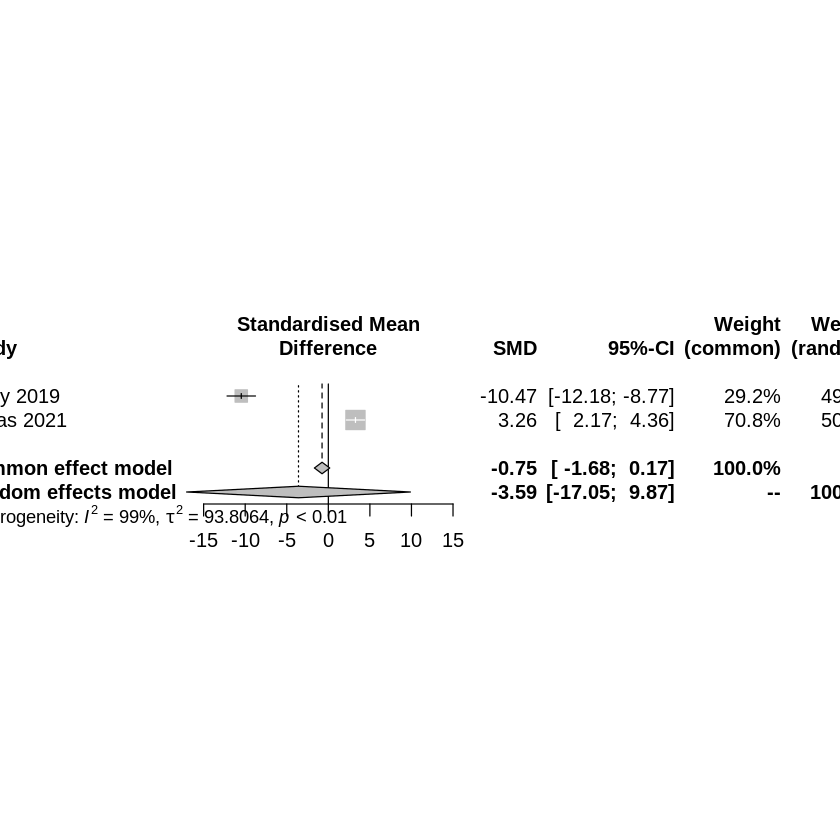

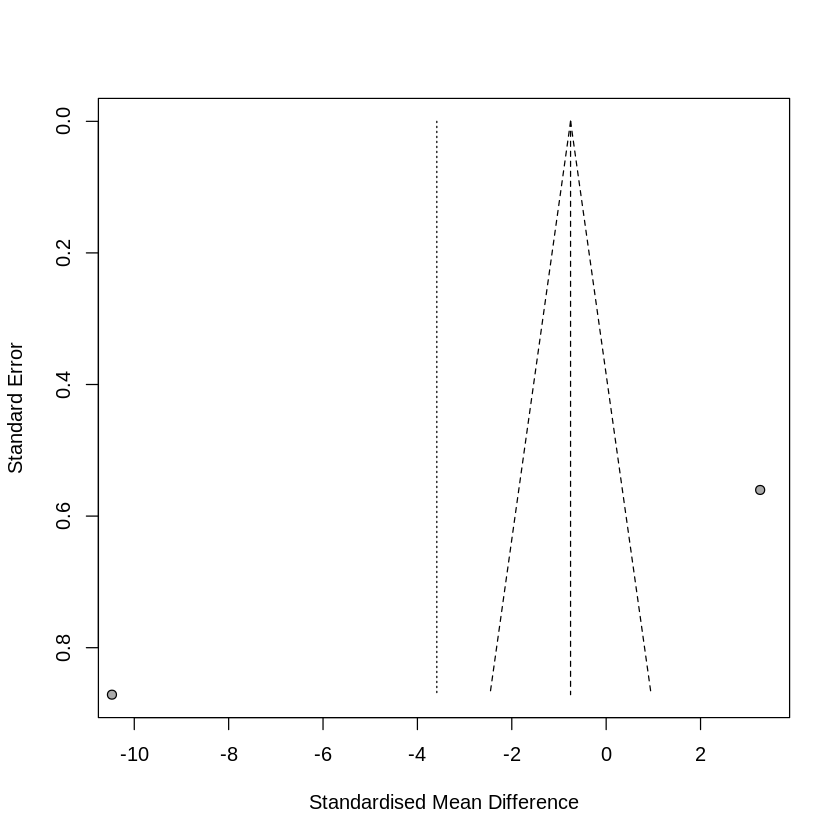

In [248]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Resilience Scale", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Resilience Scale"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Resilience Scale"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Anxiety (trait)

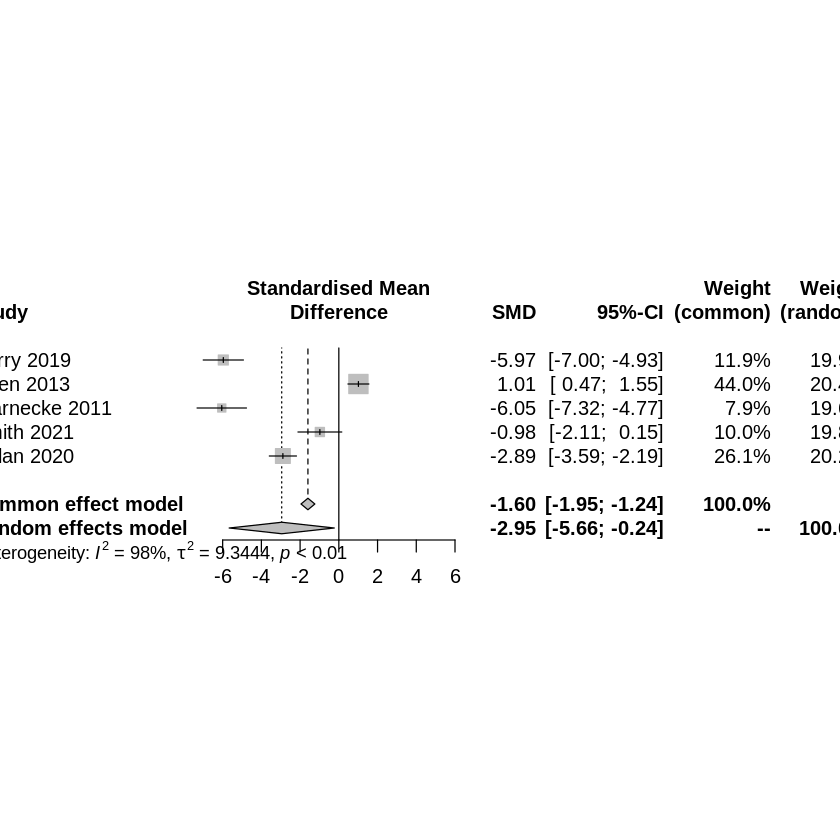

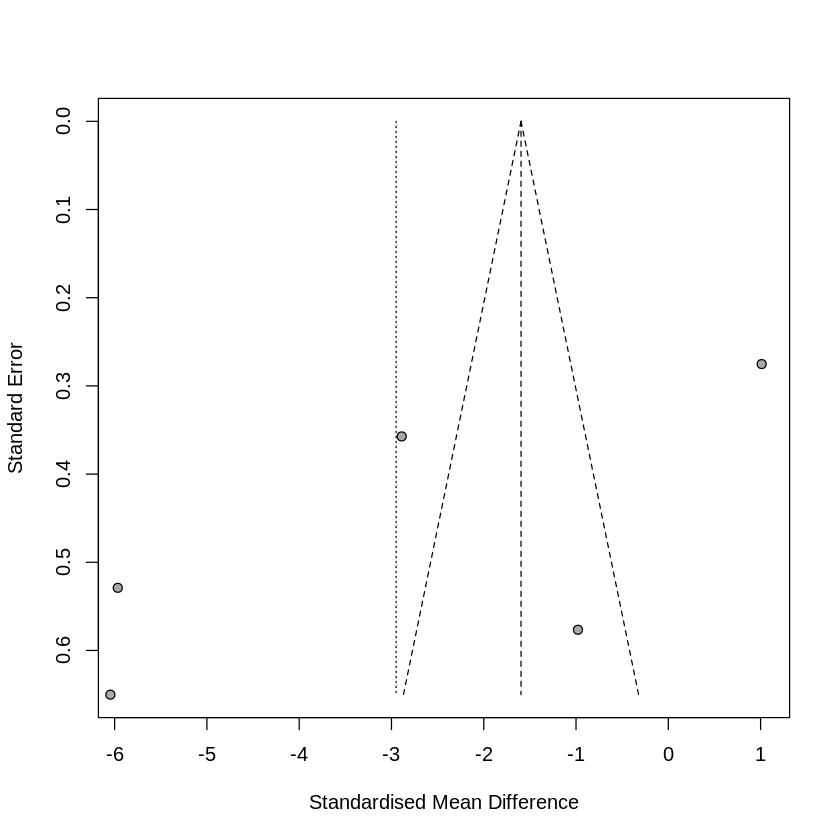

In [249]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Anxiety (trait)", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Anxiety (trait)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Anxiety (trait)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Anxiety (state)

In [250]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Anxiety (state)", meditation.type.attentional, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Anxiety (state)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Anxiety (state)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

Error in outome: Anxiety (state)



[1] ""

#### Depression (trait)

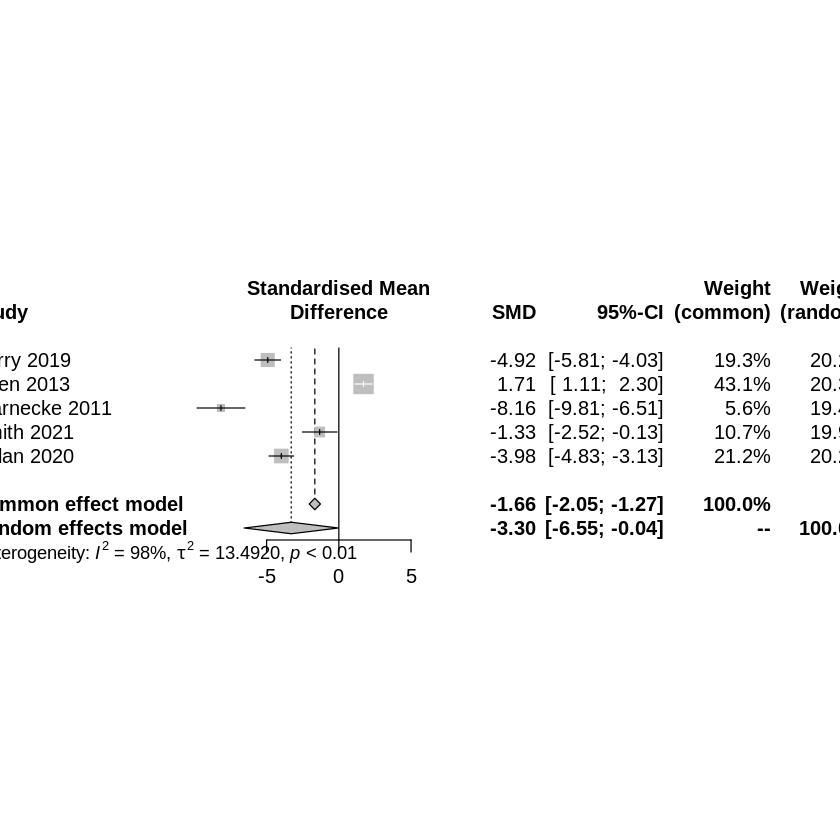

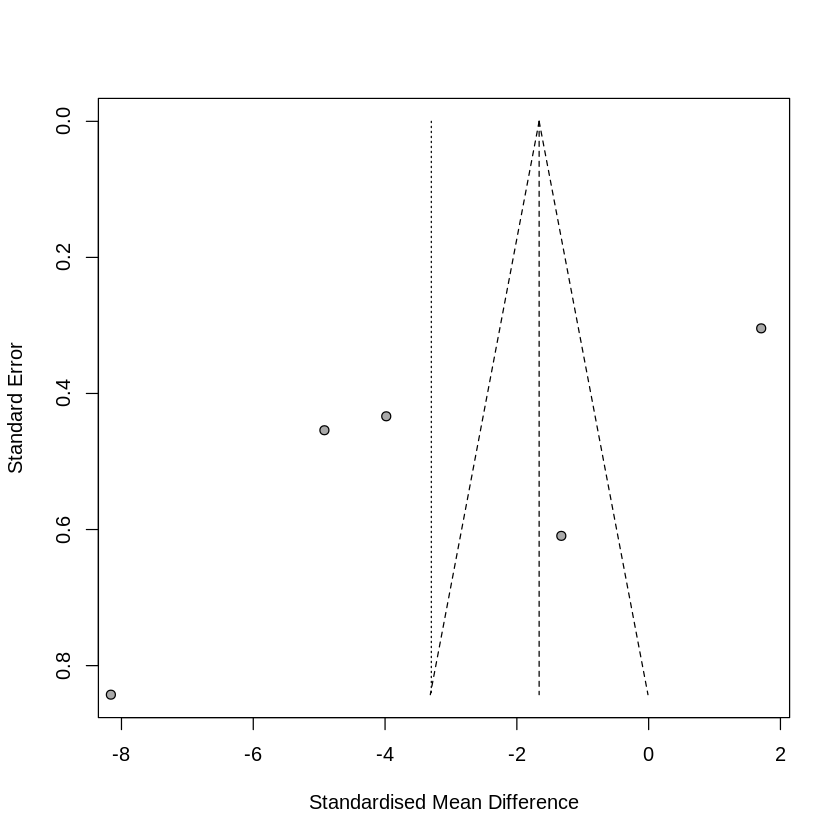

In [251]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Depression (trait)", meditation.type.attentional, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Depression (trait)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Depression (trait)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Stress

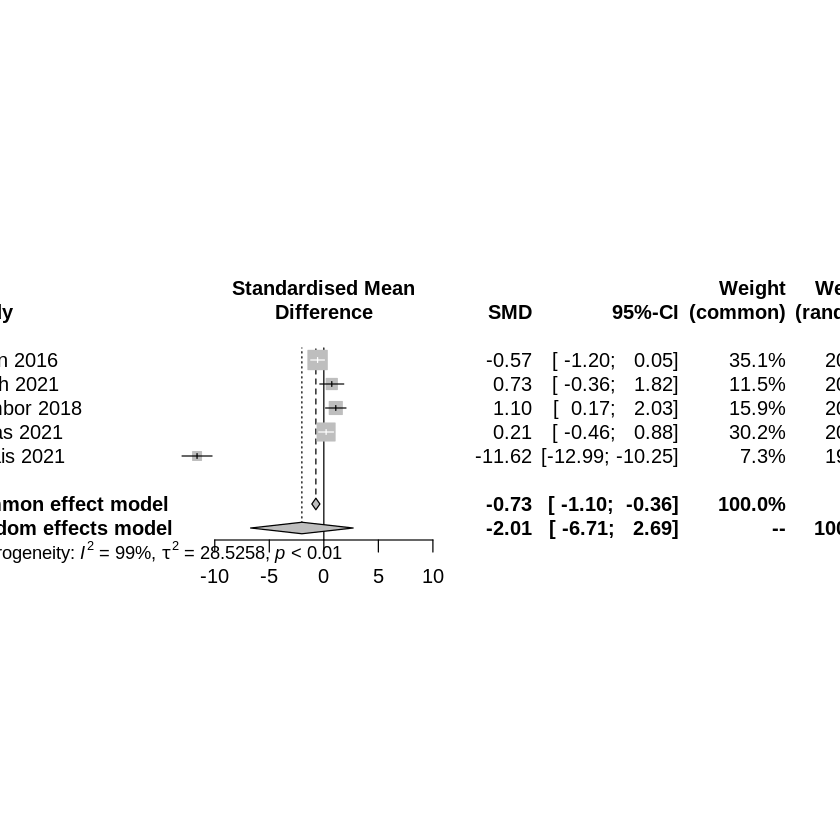

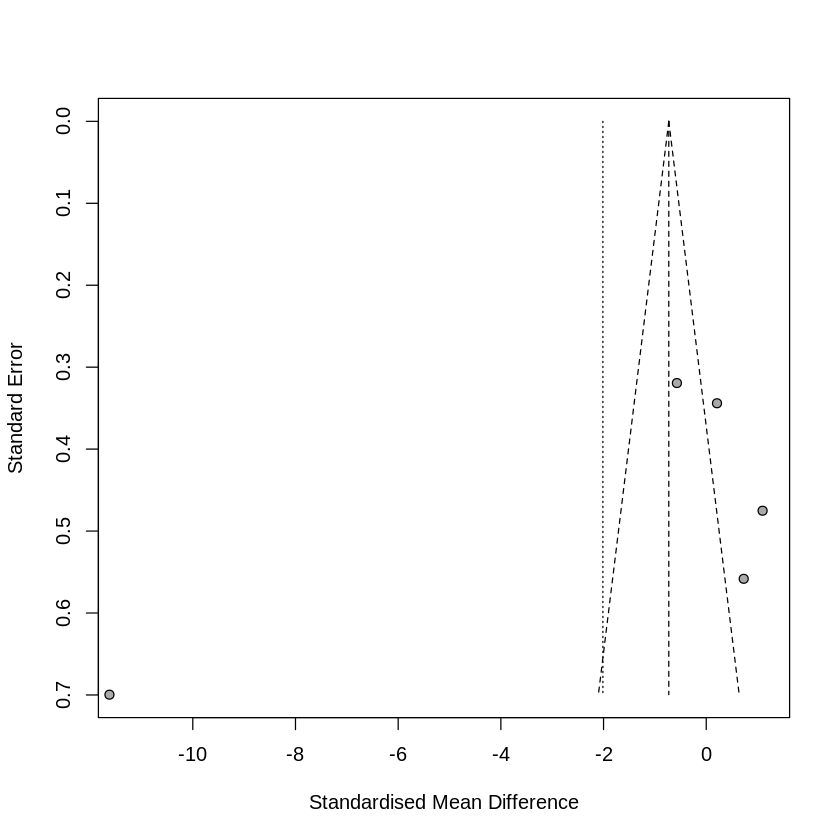

In [252]:
prefered.scales <- c("Depression Anxiety and Stress Scale (DASS)", "Perceived Stress Scale (PSS)")

forest.plt.by.outcome..med.type(
  "Stress", meditation.type.attentional, m.data.list, time.point = 2, double.scale = TRUE, prefered.scale = prefered.scales[1]
)

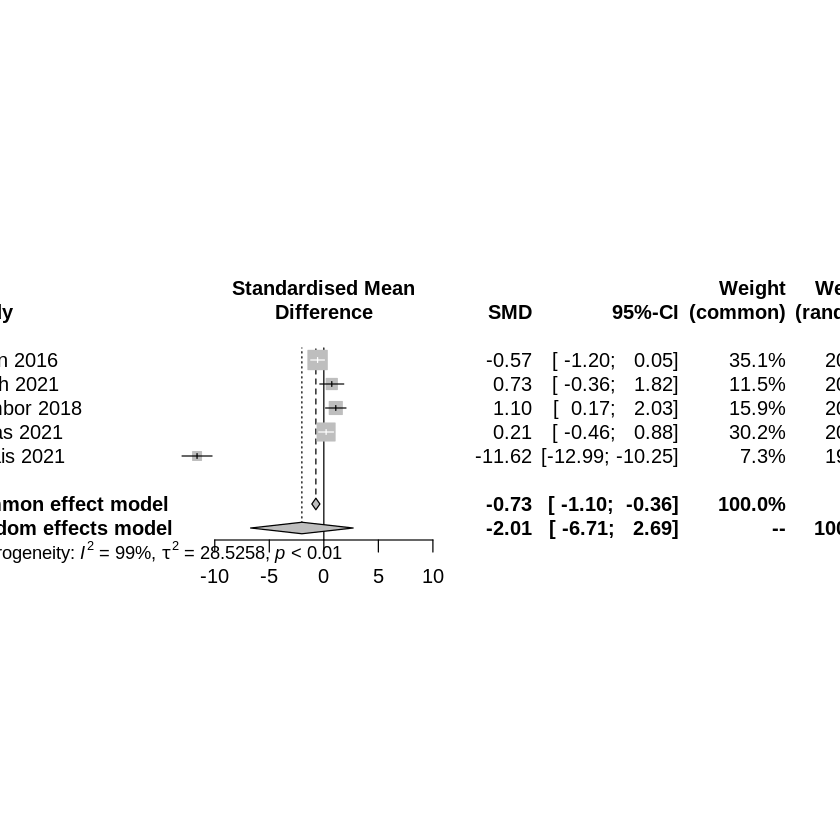

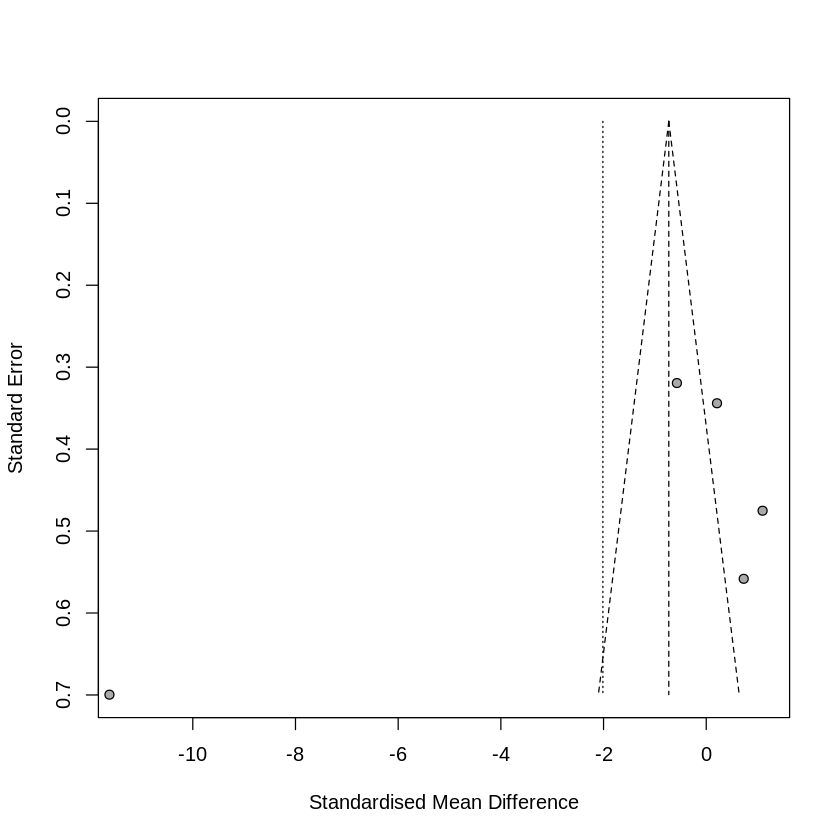

In [253]:
forest.plt.by.outcome..med.type(
  "Stress", meditation.type.attentional, m.data.list, time.point = 2, double.scale = TRUE, prefered.scale = prefered.scales[2]
)

#### Well-being or quality of life

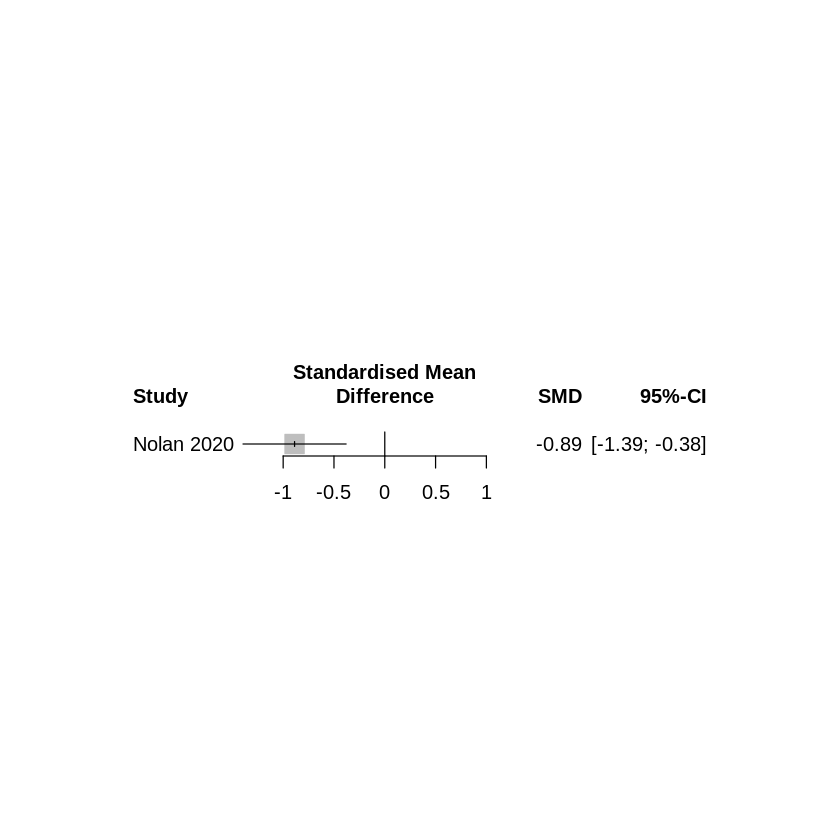

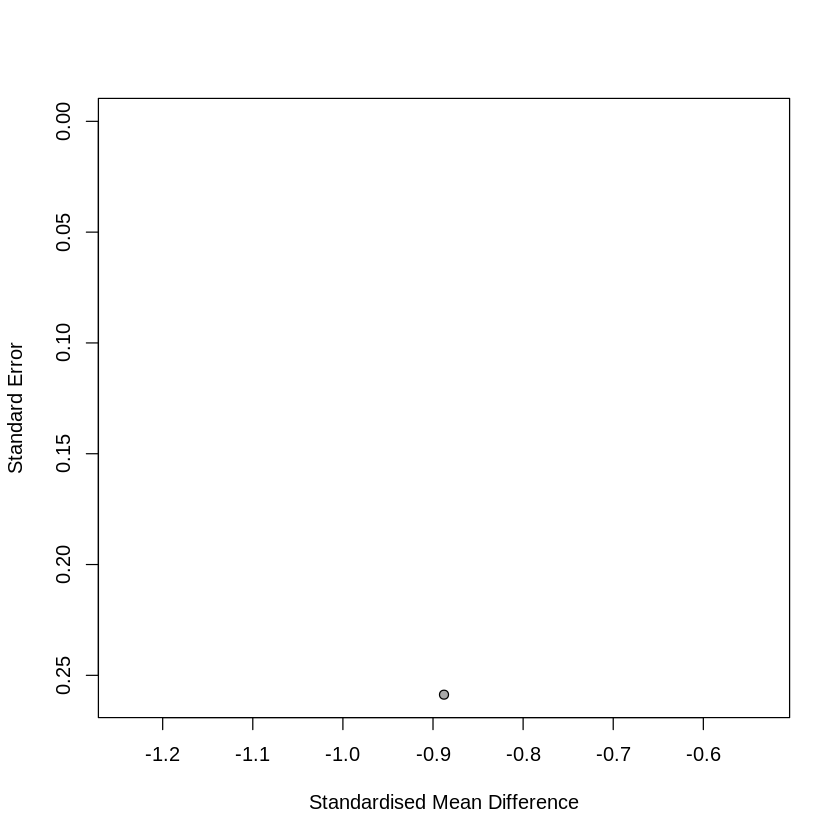

In [254]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Well-being or quality of life", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Well-being or quality of life"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Well-being or quality of life"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Acceptance

In [255]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Acceptance", meditation.type.attentional, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Acceptance"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Acceptance"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

Error in outome: Acceptance



[1] ""

#### Empathy

In [256]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Empathy", meditation.type.attentional, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Empathy"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Empathy"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

Error in outome: Empathy



[1] ""

#### Hope

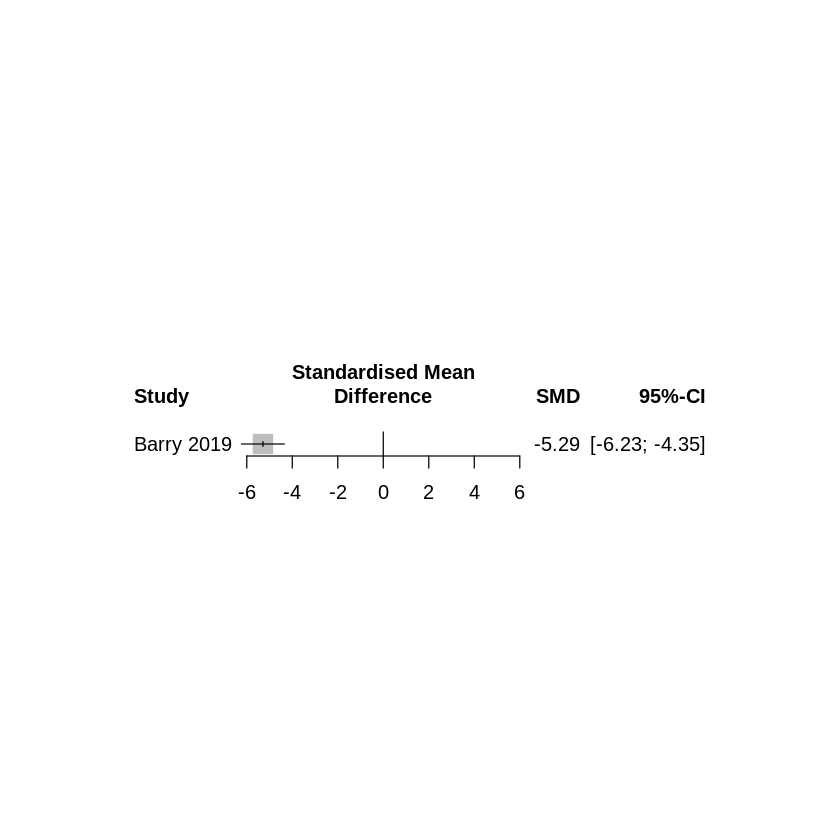

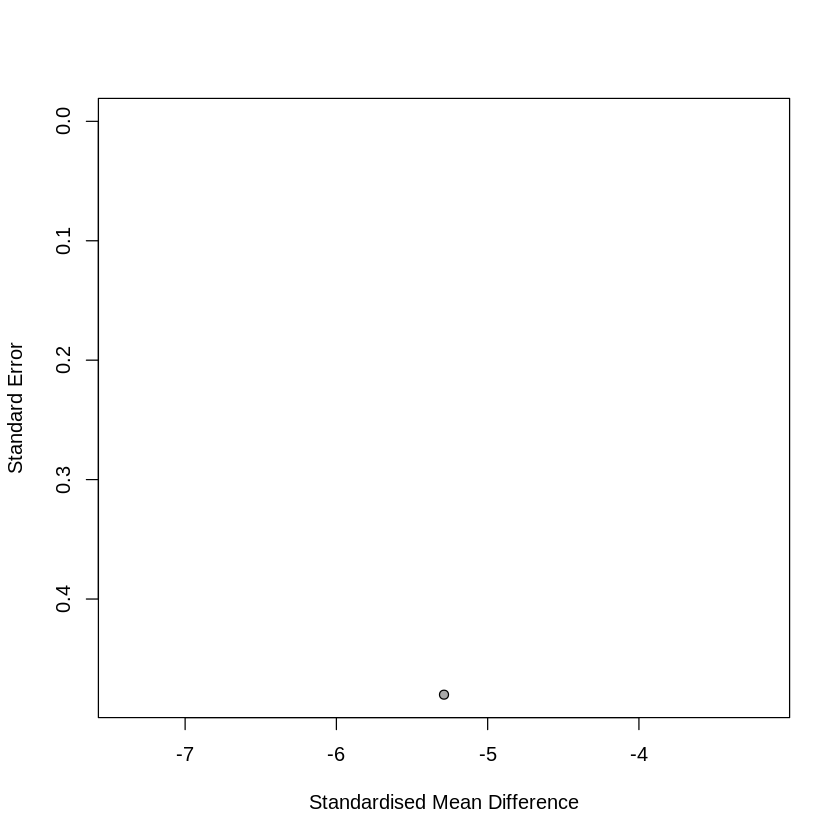

In [257]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Hope", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Hope"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Hope"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Mindfulness (state)

In [258]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Mindfulness (state)", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Mindfulness (state)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Mindfulness (state)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

Error in outome: Mindfulness (state)



[1] ""

#### Mindfulness (trait)

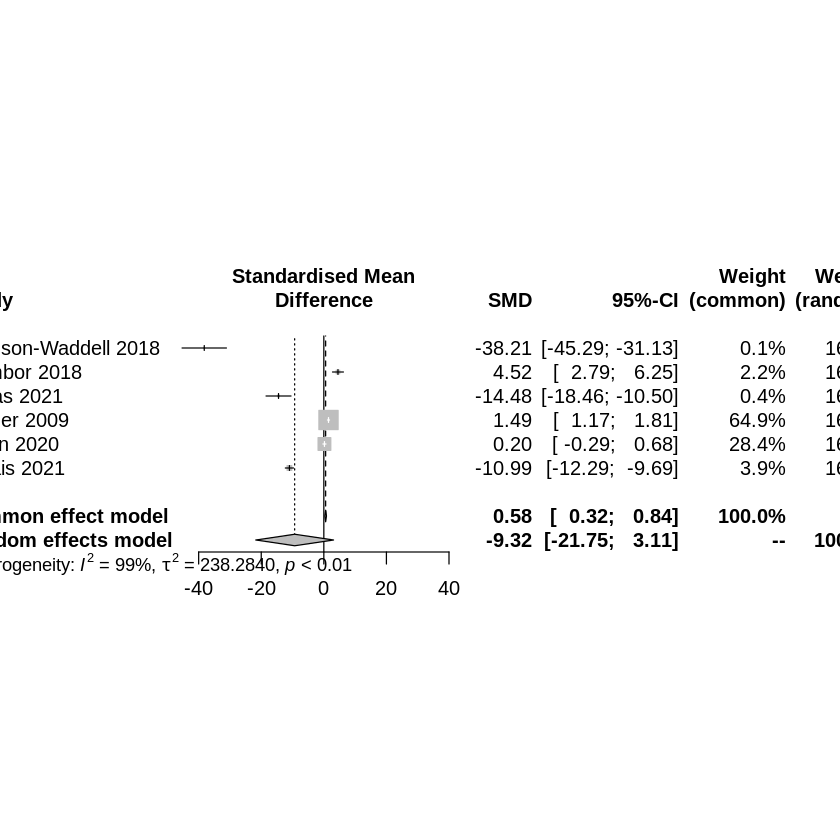

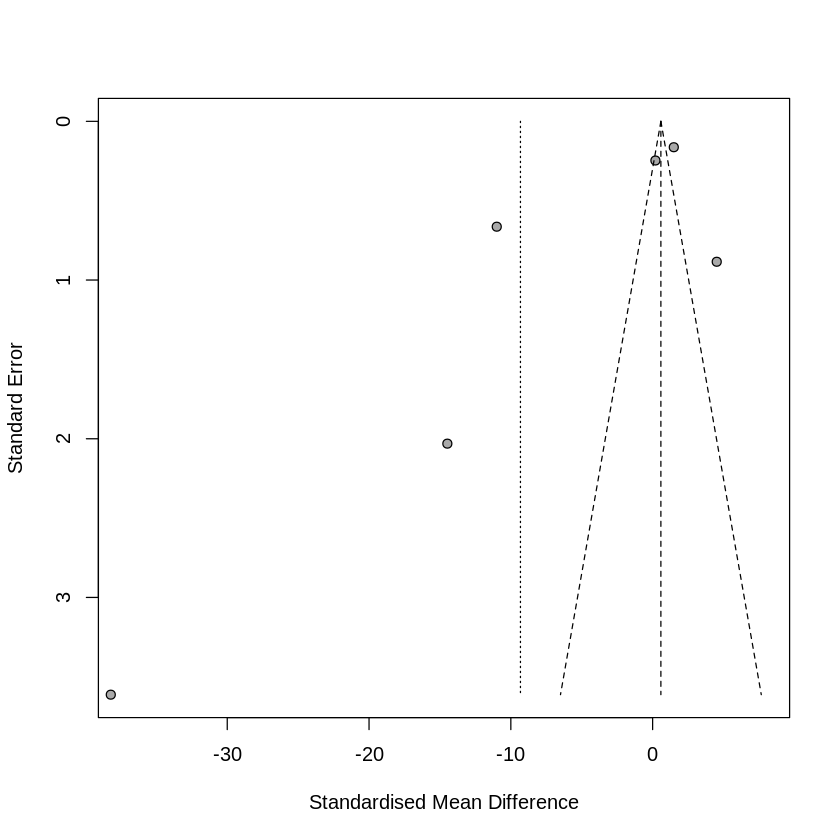

In [259]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Mindfulness (trait)", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Mindfulness (trait)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Mindfulness (trait)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Optimism or positive attributional style

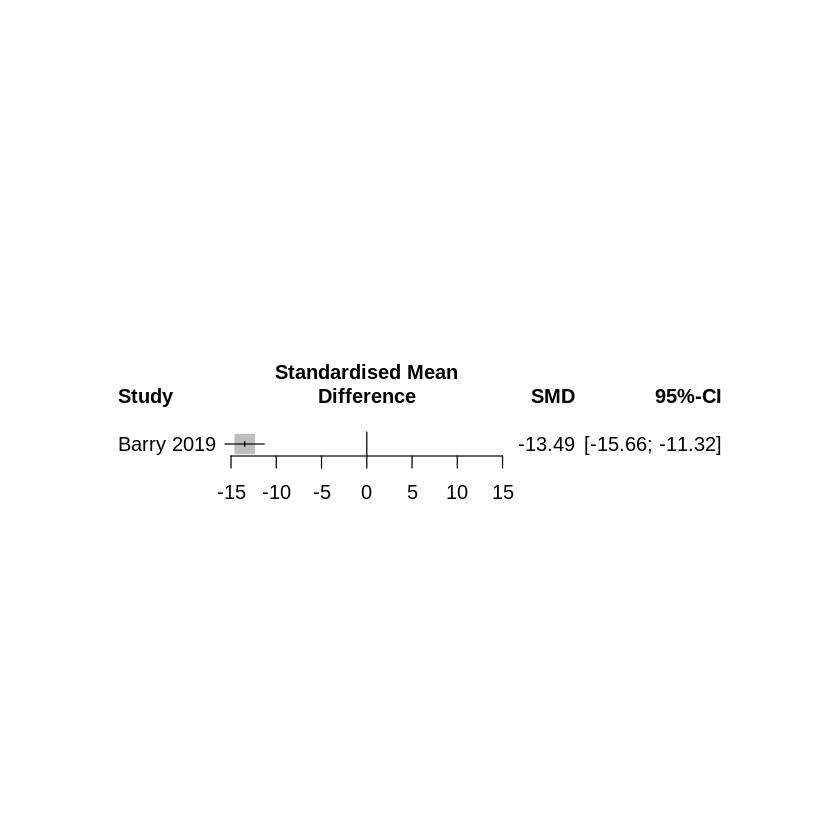

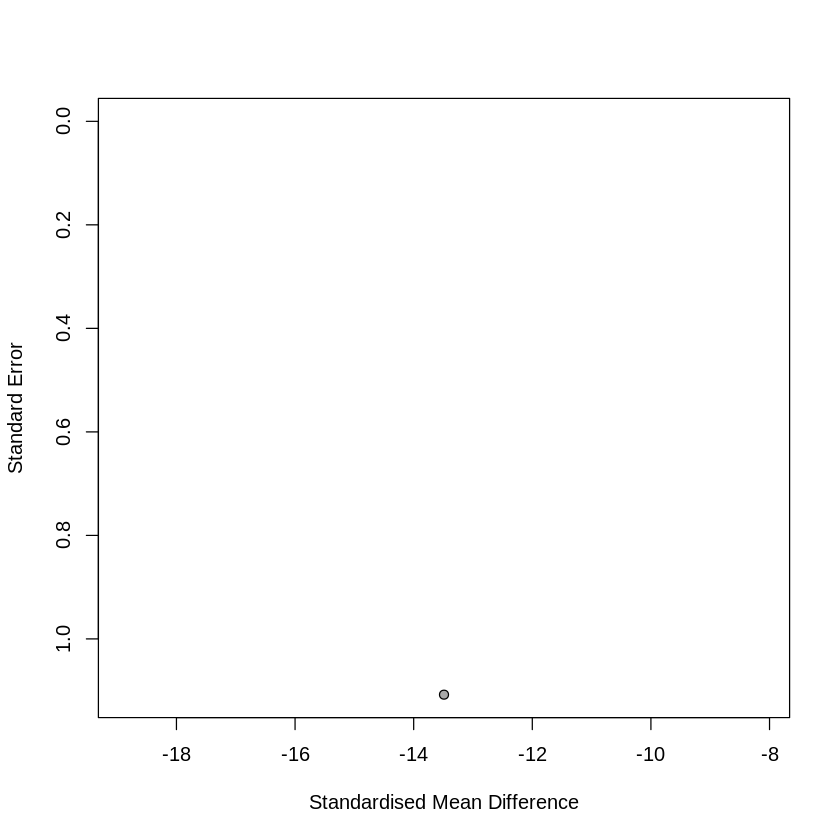

In [260]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Optimism or positive attributional style", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Optimism or positive attributional style"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Optimism or positive attributional style"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Religiosity or spirituality or religious coping

In [261]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Religiosity or spirituality or religious coping", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Religiosity or spirituality or religious coping"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Religiosity or spirituality or religious coping"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

Error in outome: Religiosity or spirituality or religious coping



[1] ""

#### Self-efficacy

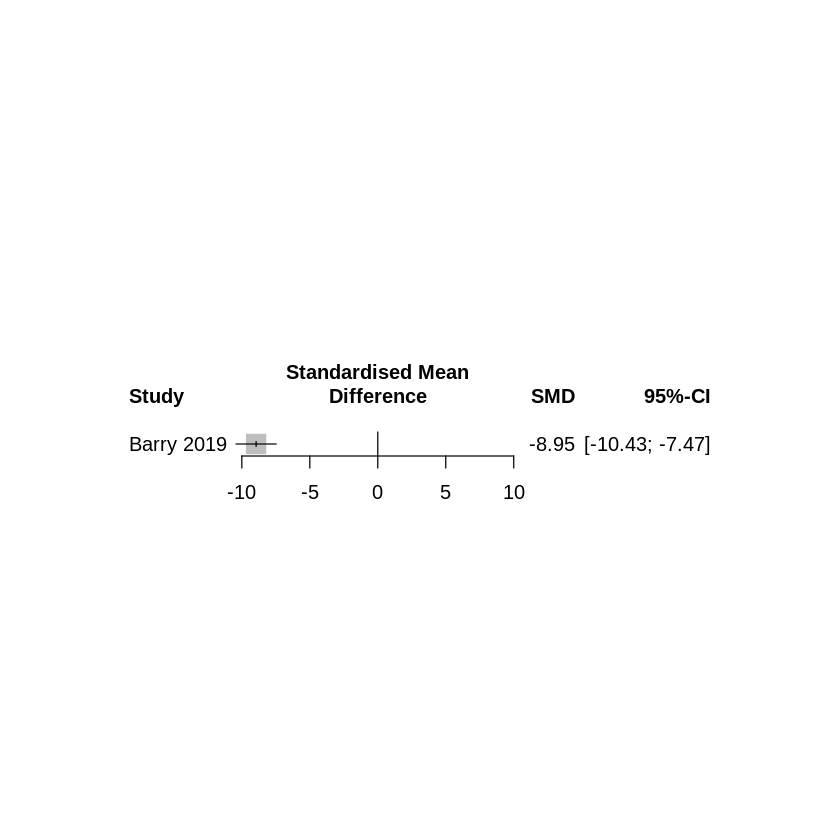

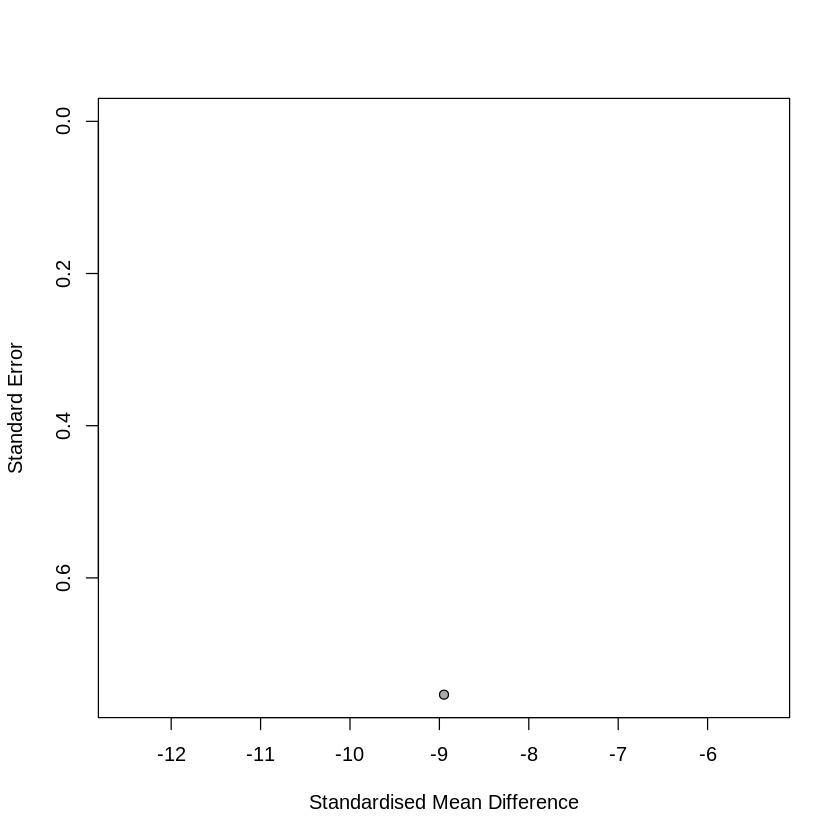

In [262]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-efficacy", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-efficacy"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-efficacy"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Self-acceptance

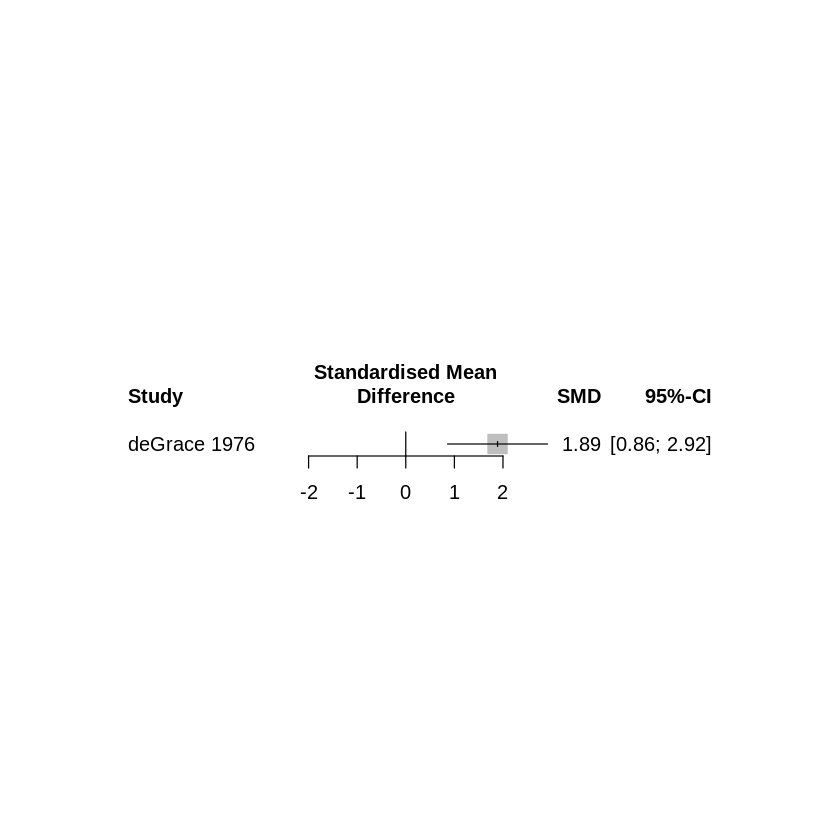

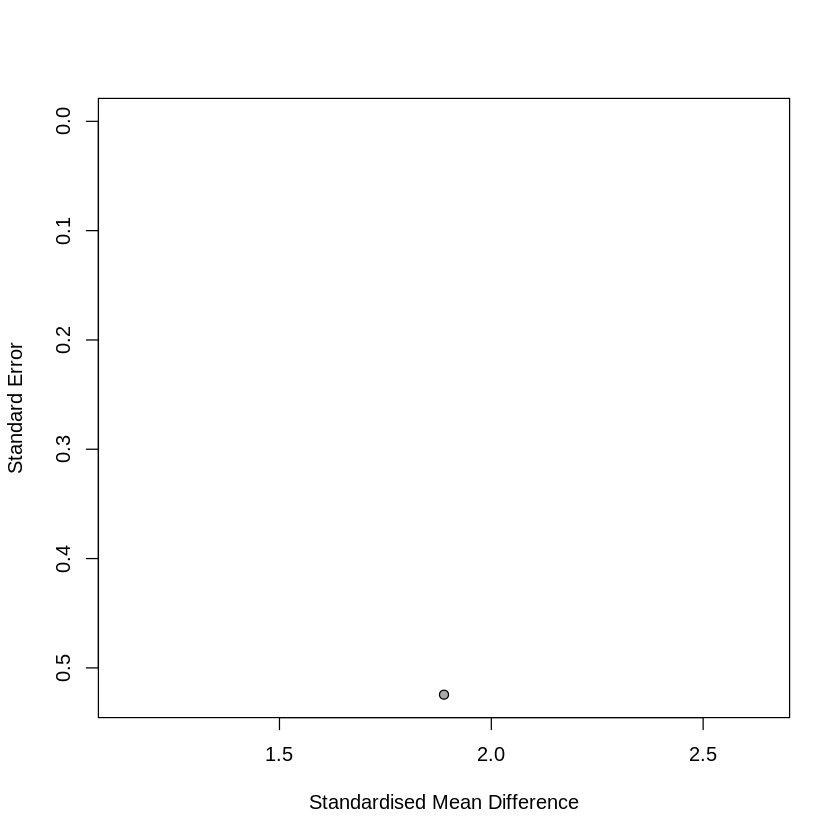

In [263]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-acceptance", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-acceptance"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-acceptance"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Self-esteem

In [264]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-esteem", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-esteem"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-esteem"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

Error in outome: Self-esteem



[1] ""

### Constructive Family

#### Resilience Scale

In [265]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Resilience Scale", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Resilience Scale"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Resilience Scale"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

Error in outome: Resilience Scale



[1] ""

#### Anxiety (trait)

In [266]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Anxiety (trait)", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Anxiety (trait)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Anxiety (trait)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

Error in outome: Anxiety (trait)



[1] ""

#### Anxiety (state)

In [267]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Anxiety (state)", meditation.type.constructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Anxiety (state)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Anxiety (state)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

Error in outome: Anxiety (state)



[1] ""

#### Depression (trait)

In [268]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Depression (trait)", meditation.type.constructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Depression (trait)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Depression (trait)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

Error in outome: Depression (trait)



[1] ""

#### Stress

In [269]:
prefered.scales <- c("Depression Anxiety and Stress Scale (DASS)", "Perceived Stress Scale (PSS)")

forest.plt.by.outcome..med.type(
  "Stress", meditation.type.constructive, m.data.list, time.point = 2, double.scale = TRUE, prefered.scale = prefered.scales[1]
)

ERROR: ignored

In [ ]:
forest.plt.by.outcome..med.type(
  "Stress", meditation.type.constructive, m.data.list, time.point = 2, double.scale = TRUE, prefered.scale = prefered.scales[2]
)

#### Well-being or quality of life

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Well-being or quality of life", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Well-being or quality of life"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Well-being or quality of life"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Acceptance

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Acceptance", meditation.type.constructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Acceptance"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Acceptance"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Empathy

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Empathy", meditation.type.constructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Empathy"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Empathy"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Hope

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Hope", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Hope"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Hope"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Mindfulness (state)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Mindfulness (state)", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Mindfulness (state)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Mindfulness (state)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Mindfulness (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Mindfulness (trait)", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Mindfulness (trait)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Mindfulness (trait)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Optimism or positive attributional style

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Optimism or positive attributional style", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Optimism or positive attributional style"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Optimism or positive attributional style"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Religiosity or spirituality or religious coping

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Religiosity or spirituality or religious coping", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Religiosity or spirituality or religious coping"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Religiosity or spirituality or religious coping"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Self-efficacy

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-efficacy", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-efficacy"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-efficacy"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Self-acceptance

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-acceptance", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-acceptance"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-acceptance"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Self-esteem

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-esteem", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-esteem"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-esteem"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

### Attentional and Contructive Family mixed

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Resilience Scale", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Resilience Scale"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Resilience Scale"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Anxiety (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Anxiety (trait)", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Anxiety (trait)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Anxiety (trait)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Anxiety (state)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Anxiety (state)", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Anxiety (state)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Anxiety (state)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Depression (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Depression (trait)", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Depression (trait)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Depression (trait)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Stress

In [ ]:
prefered.scales <- c("Depression Anxiety and Stress Scale (DASS)", "Perceived Stress Scale (PSS)")

forest.plt.by.outcome..med.type(
  "Stress", meditation.type.attentional.and.constructive, m.data.list, time.point = 2, double.scale = TRUE, prefered.scale = prefered.scales[1]
)

In [ ]:
forest.plt.by.outcome..med.type(
  "Stress", meditation.type.attentional.and.constructive, m.data.list, time.point = 2, double.scale = TRUE, prefered.scale = prefered.scales[2]
)

#### Well-being or quality of life

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Well-being or quality of life", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Well-being or quality of life"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Well-being or quality of life"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Acceptance

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Acceptance", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Acceptance"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Acceptance"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Empathy

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Empathy", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Empathy"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Empathy"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Hope

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Hope", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Hope"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Hope"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Mindfulness (state)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Mindfulness (state)", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Mindfulness (state)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Mindfulness (state)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Mindfulness (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Mindfulness (trait)", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Mindfulness (trait)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Mindfulness (trait)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Optimism or positive attributional style

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Optimism or positive attributional style", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Optimism or positive attributional style"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Optimism or positive attributional style"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Religiosity or spirituality or religious coping

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Religiosity or spirituality or religious coping", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Religiosity or spirituality or religious coping"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Religiosity or spirituality or religious coping"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Self-efficacy

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-efficacy", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-efficacy"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-efficacy"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Self-acceptance

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-acceptance", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-acceptance"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-acceptance"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Self-esteem

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-esteem", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-esteem"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-esteem"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

### All Families mixed 

#### Resilience Scale

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Resilience Scale", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Resilience Scale"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Resilience Scale"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Anxiety (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Anxiety (trait)", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Anxiety (trait)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Anxiety (trait)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Anxiety (state)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Anxiety (state)", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Anxiety (state)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Anxiety (state)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Depression (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Depression (trait)", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Depression (trait)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Depression (trait)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Stress

In [ ]:
prefered.scales <- c("Depression Anxiety and Stress Scale (DASS)", "Perceived Stress Scale (PSS)")

forest.plt.by.outcome..med.type(
  "Stress", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2, double.scale = TRUE, prefered.scale = prefered.scales[1]
)

In [ ]:
forest.plt.by.outcome..med.type(
  "Stress", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2, double.scale = TRUE, prefered.scale = prefered.scales[2]
)

#### Well-being or quality of life

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Well-being or quality of life", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Well-being or quality of life"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Well-being or quality of life"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Acceptance

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Acceptance", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Acceptance"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Acceptance"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Empathy

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Empathy", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Empathy"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Empathy"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Hope

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Hope", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Hope"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Hope"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Mindfulness (state)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Mindfulness (state)", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Mindfulness (state)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Mindfulness (state)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Mindfulness (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Mindfulness (trait)", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Mindfulness (trait)"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Mindfulness (trait)"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Optimism or positive attributional style

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Optimism or positive attributional style", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Optimism or positive attributional style"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Optimism or positive attributional style"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Religiosity or spirituality or religious coping

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Religiosity or spirituality or religious coping", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Religiosity or spirituality or religious coping"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Religiosity or spirituality or religious coping"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Self-efficacy

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-efficacy", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-efficacy"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-efficacy"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Self-acceptance

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-acceptance", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-acceptance"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-acceptance"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

#### Self-esteem

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-esteem", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-esteem"))
    # message(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-esteem"))
    # message(cond)
    return("")
    # except part for warnings
  }
)

# Old Code

In [ ]:
prefered.scales <- c("Depression Anxiety and Stress Scale (DASS)", "Perceived Stress Scale (PSS)")

for (outcome in present.outcomes){
  print(outcome)
  if (outcome == "Stress"){
    for (prefered.scale in prefered.scales){
      print(prefered.scale)
      forest.plt.by.outcome..med.type(
        outcome, meditation.type.attentional, m.data.list, time.point = 2, double.scale = TRUE, prefered.scale = prefered.scale
      )
      Sys.sleep(1)
      cat("\n\n")
    }
  } else {
    print(outcome)
    tryCatch(
      {
      forest.plt.by.outcome..med.type(
        outcome, meditation.type.attentional, m.data.list, time.point = 2
      )
      Sys.sleep(1)
          # try part
      },
      error=function(cond) {
        message(paste("Error in outome:", outcome))
        # message(cond)
        return("")
        # except part for errors
      },
      warning=function(cond) {
        message(paste("Warning in outome:", outcome))
        # message(cond)
        return("")
        # except part for warnings
      }
    )
    cat("\n\n")
  }
  print("#########################################")
}

In [ ]:
prefered.scales <- c("Depression Anxiety and Stress Scale (DASS)", "Perceived Stress Scale (PSS)")

for (outcome in present.outcomes){
  print(outcome)
  if (outcome == "Stress"){
    for (prefered.scale in prefered.scales){
      cat(" prefered scale:", prefered.scale)
      forest.plt.by.outcome..med.type(
        outcome, meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2, double.scale = TRUE, prefered.scale = prefered.scale
      )
      cat("\n")
    }
  } else {
    print(outcome)
    tryCatch(
      {
      forest.plt.by.outcome..med.type(
        outcome, meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
      )
          # try part
      },
      error=function(cond) {
        message(paste("Error in outome:", outcome))
        # message(cond)
        return("")
        # except part for errors
      },
      warning=function(cond) {
        message(paste("Warning in outome:", outcome))
        # message(cond)
        return("")
        # except part for warnings
      }
    )
    cat("\n")
  }
}

# Code of Test-Meta-Analyses

In [ ]:
library('readxl')
# import csv file into R
# data <- read_excel('review_47966_20220515233722.xlsx')
# write.csv(data, file = 'review_47966_20220515233722.csv')
data <- read.csv('review_47966_20220515233722.csv')

# create df of all Meditation 1 studies
data.med1 =  data[data$Practiced.Techniques.in.Intervention.1 == 'Meditation 1', ] # select only rows with meditation 1 as intervetion 1


# pooled.sd <- sqrt(((n1-1)*s1^2 + (n2-1)*s2^2) / (n1+n1-2))
# mean.diff <- mean.1 - mean.2
# cohens'd <- mean.diff/pooled.sd
# calculate hedges g out of cohens d with hedges_g()

# create df for meta analysis with Meditation 1
library('esc')
df.meta <- data.frame(
  study.id =	data.med1[, 'Study.ID'],
  number.meditation =	data.med1[, 'Sample.size.Intervention.1.T1'],  # number of participants in meditation condition
  mean.meditation =	data.med1[, 'Intervention.1.Mean.T2'],
  sd.meditation =	data.med1[, 'Intervention.1.SD.T2'],
  number.control =	data.med1[, 'Sample.size.Intervention.2.T1'],
  mean.conttrol	= data.med1[, 'Intervention.2.Mean.T2'],
  sd.control	= data.med1[, 'Intervention.2.SD.T2'],
  med.frequency = data.med1[, 'Frequency'],
  pooled.sd = sqrt((data.med1[, 'Sample.size.Intervention.1.T1']-1)*data.med1[, 'Intervention.1.SD.T2']^2 + (data.med1[, 'Sample.size.Intervention.2.T1']-1)*data.med1[, 'Intervention.2.SD.T2']^2) / (data.med1[, 'Sample.size.Intervention.1.T1']+data.med1[, 'Sample.size.Intervention.1.T1']-2),
  mean.diff.T2 = data.med1[, 'Intervention.1.Mean.T2']-data.med1[, 'Intervention.2.Mean.T2']
)

df.meta$hedges.g <- (df.meta[, "pooled.sd"] / df.meta[, "mean.diff.T2"])

library('meta')
res.df_meta =  metacont(number.meditation, mean.meditation, sd.meditation, 
                        number.control, mean.conttrol, sd.control,
                        fixed = T, random = T, studlab = study.id,
                        data = df.meta, sm = "SMD")

# plot forest plot
forest(res.df_meta, leftcols = c('studlab'))

# plot funnel plot
funnel(res.df_meta)

# metabias: Test for funnel plot asymmetry, based on rank correlation or linear regression method.
metabias(res.df_meta, method.bias = 'linreg', k.min = , plotit = T)
# The p-value is 0.973 which implies no publication bias. However, this meta-analysis contains k=5 studies. Egger’s test may lack the statistical power to detect bias when the number of studies is small (i.e., k<10).

# conduct meta-regression, see: https://cjvanlissa.github.io/Doing-Meta-Analysis-in-R/plotting-regressions.html
library('metafor')
random.effects.model <- rma(
  df.meta[, "hedges.g"],
  df.meta[, "pooled.sd"]
)
  # second paramenter in rma-function = sampling variance = pooled standard deviation?

install.packages('ggplot2')
library(ggplot2)

df.meta$weights <- 1/sqrt(df.meta$pooled.sd)
# Specify basic plot, mapping med.frequency to the x-axis, effect size 'hedges.g' to the y-axis,
# and 'weights' to the weight parameter.
ggplot(df.meta, aes(x = med.frequency, y = hedges.g, size = weights)) +
  geom_point(shape = 1) + # Add scatter
  geom_abline(intercept = random.effects.model$b[1], slope = random.effects.model$b[2]) + # Add regression line
  theme_bw() + # Apply black and white theme
  theme(legend.position = "none") # Remove legend
  # see link for beatiful meta-regression with convidence intervals: https://bookdown.org/robcrystalornelas/meta-analysis_of_ecological_data/meta-regression.html#meta-regression-with-continuous-variable

# plot traffic light plot for RoB
## use {robvis} via the rob_traffic_light function
## see: https://bookdown.org/MathiasHarrer/Doing_Meta_Analysis_in_R/risk-of-bias-plots.html#traffic-light-plots

# plot Summary Plots
## use use {robvis} via the rob_summary function

# Notes

- Different Scales
    - 2 Array-Dims with same values
    - Results in Dim "Scale.2" only if 2nd scale is present, else: NA

- Ignore 2nd scale entry for Sloan 2016 

# ToDo

- find solution for
  - value: '3.79 during intervention, 2.04 during follow-up mean' in "Frequency.of.intervention.sessions.in.times.per.week.Intervention.1"
- Function that plots forestplots by outcome and meditation type
  - why does filtering by meditation types does not work?

# Array Dims and Dimnames

Dates of Measuring Time Points
	4 x 1
	c("Time.Point.0", "Time.Point.1", "Time.Point.2", "Time.Point.3")
	c("Date")
	Time.Point.0.Date:Time.Point.3.Date
	
Between-Measuring Time Points' Duration
	3 x 1
	c("Time.Point.0...1", "Time.Point.0...2", "Time.Point.0...3")
	c("Duration.in.Days")
	Time.Point.0...1:Duration.in.Days

Intervention and Comparisons
	7 x 4
	c("Name", "Short.Description", "Delivery.Mode", "Meditation.App", "Sessions.Duration.in.minutes", Frequency.in.times.per.week", "Total.Duration.in.Days")
	c("Intervention.1", "Intervention.2", "Intervention.3", "Control")
	Name.Intervention 1:Total.Duration.of.Intervention.in.Days.Control.or.Intervention.4

Definition of Outcomes
	7 x 1
	c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7")
	c("Definition")
	Outcome.1:Definition

Measures of Outcomes
	7 x 3
	c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7")
	c("Measures.Name", "Start.and.End.Point", "High.or.low.means.resilient")
	Outcome.1.Scale.s.or.other.Measure.s.Name:Outcome.7.High.or.low.means.resilient
	
Means and SDs of Outcomes
	4 x 3 x 4 x 7
	c("Intervention.1", "Intervention.2", "Intervention.3", "Control"
	c("Mean", "SD", "n")
	c("T0", "T1", "T2", "T3")
	c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7")
	Intervention.1.Mean.O1T0:Control.or.Intervention.4.n.in.case.of.period.O7T3

Quantitative Results of Data Analyses
	7 x 3 x 3 x 6
	c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7")
	c("P.Value", "Effect.Size", "Effect.Size.CI")
	c("T1", "T2", "T3")
	c("Int1.X.Int2", "Int1.X.Int3", "Int1.X.Int4", "Int2.X.Int3", "Int2.X.Int4", "Int3.X.Int4")
	Outcome.1.P.Value.1x2T1:Outcome.7.Confidence.Interval.of.Effect.Size.3x4T3

Qualitative Results of Data Analyses
	7 x 3
	c("Key.Theme.1", "Key.Theme.2", "Key.Theme.4", "Key.Theme.5", "Key.Theme.6", "Key.Theme.7")
	c("Name.of.Key.Theme", "Description.of.Key.Theme", "Results")
	Key.Theme.1:Results